# CARGA DATOS

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Automcompletar rápido
%config IPCompleter.greedy=True
# pd.set_option('display.max_colwidth',1000)

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'C:/Users/tania.camacho/Desktop/Master/EstructuraDirectorio/04_PORTAFOLIO/01_PORTAFOLIO_INMO'

Nombres de los ficheros de datos.

In [3]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'

Cargar los datos.

In [4]:
cat = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_cat)
num = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_num)

# CREACION DE NUEVAS VARIABLES

En este apartado vamos a crear nuevas variables que ayuden al análisis de datos, al algoritmo a predecir y tambien crearemos la target. Para ello, vamos a unificar los dataset de cat y num en un df completo y posteriormente volveremos a separar para el análisis de datos.

In [5]:
df_temp = pd.concat([cat,num], axis =1)
df_temp

,name,neighbourhood_group,neighbourhood,room_type,description,latitude,longitude,price,minimum_nights,availability_365,accommodates,bathrooms,bedrooms,beds,precio_m2
id,,,,,,,,,,,,,,,
702998,"NICE FLAT, 2 TV's AND FREE WIFI",Casco Antiguo,Santa Catalina,Entire home/apt,"Gorgeous flat in the centre of Seville, 5 minu...",37.390800,-5.985430,59.0,3,0,2,1.0,1.0,1.0,3601
704131,Reservaloen Casa del Museo studio 2,Casco Antiguo,Museo,Entire home/apt,Apartamentos Casa del Museo is located next to...,37.391640,-6.000220,253.0,1,119,4,1.0,1.0,2.0,3601
705652,Historic home downtown Seville1,Casco Antiguo,San Vicente,Private room,NaN,37.396350,-5.998680,42.0,2,307,2,1.0,1.0,2.0,3601
705697,Room near center +breakfast,Triana,Triana Este,Private room,Private double room in TRIANA. 15 min distanc...,37.377630,-6.006400,35.0,3,190,1,1.0,1.0,1.0,3118
721753,Apartment in the historic center- VFT/SE/00056,Casco Antiguo,Alfalfa,Entire home/apt,"Cozy apartment next to the ""Plaza de la Alfalf...",37.390290,-5.989020,76.0,3,120,2,1.0,1.0,1.0,3601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121798049593048185,plaza del museo,Casco Antiguo,Museo,Private room,This home is strategically located-it will be ...,37.391536,-6.000180,167.0,1,180,3,1.0,1.0,3.0,3601
1122218429501569213,Tartessos Apartamentos 1,San Pablo - Santa Justa,"San Carlos, Tartessos",Entire home/apt,"Relax and unwind in this quiet, fully renovate...",37.398657,-5.970950,137.0,2,113,4,1.0,1.0,2.0,2392
1122329926019227935,piso acogedor y tranquilo,San Pablo - Santa Justa,"Carretera de Carmona, María Auxiliadora, Fontanal",Private room,Forget the worries in this great home - it's a...,37.397021,-5.978117,42.0,2,252,2,2.0,2.0,3.0,2392


## Crear la target

Target – ocupación de la vivienda al año (en %).

En el dataset tenemos los días en los que el inmueble está disponible en la variable llamada availability_365, es decir, que la diferencia de esos días serían los días de ocupación del inmueble. Por tanto, la ocupación real se calcularía restando a 365, el valor de esta variable y dividiendo entre 365; y finalmente multiplicando por 100, para que obtener el porcentaje. ((365 - df.availability_365)/ 365) * 100

In [6]:
# Ponemos el tipo de variable entero para que nos saque los pporcentajes redondos
df_temp['ocupacion'] = (((365 - df_temp.availability_365)/ 365) * 100).astype('int64')
df_temp[['ocupacion','availability_365']]

,ocupacion,availability_365
id,,
702998,100,0
704131,67,119
705652,15,307
705697,47,190
721753,67,120
...,...,...
1121798049593048185,50,180
1122218429501569213,69,113
1122329926019227935,30,252


In [7]:
#Eliminamos la variable availability_365 porque ya hemos calculado la de ocupación
df_temp = df_temp.drop(columns = 'availability_365')
df_temp

,name,neighbourhood_group,neighbourhood,room_type,description,latitude,longitude,price,minimum_nights,accommodates,bathrooms,bedrooms,beds,precio_m2,ocupacion
id,,,,,,,,,,,,,,,
702998,"NICE FLAT, 2 TV's AND FREE WIFI",Casco Antiguo,Santa Catalina,Entire home/apt,"Gorgeous flat in the centre of Seville, 5 minu...",37.390800,-5.985430,59.0,3,2,1.0,1.0,1.0,3601,100
704131,Reservaloen Casa del Museo studio 2,Casco Antiguo,Museo,Entire home/apt,Apartamentos Casa del Museo is located next to...,37.391640,-6.000220,253.0,1,4,1.0,1.0,2.0,3601,67
705652,Historic home downtown Seville1,Casco Antiguo,San Vicente,Private room,NaN,37.396350,-5.998680,42.0,2,2,1.0,1.0,2.0,3601,15
705697,Room near center +breakfast,Triana,Triana Este,Private room,Private double room in TRIANA. 15 min distanc...,37.377630,-6.006400,35.0,3,1,1.0,1.0,1.0,3118,47
721753,Apartment in the historic center- VFT/SE/00056,Casco Antiguo,Alfalfa,Entire home/apt,"Cozy apartment next to the ""Plaza de la Alfalf...",37.390290,-5.989020,76.0,3,2,1.0,1.0,1.0,3601,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121798049593048185,plaza del museo,Casco Antiguo,Museo,Private room,This home is strategically located-it will be ...,37.391536,-6.000180,167.0,1,3,1.0,1.0,3.0,3601,50
1122218429501569213,Tartessos Apartamentos 1,San Pablo - Santa Justa,"San Carlos, Tartessos",Entire home/apt,"Relax and unwind in this quiet, fully renovate...",37.398657,-5.970950,137.0,2,4,1.0,1.0,2.0,2392,69
1122329926019227935,piso acogedor y tranquilo,San Pablo - Santa Justa,"Carretera de Carmona, María Auxiliadora, Fontanal",Private room,Forget the worries in this great home - it's a...,37.397021,-5.978117,42.0,2,2,2.0,2.0,3.0,2392,30


## Crear variable distancia

Para crear esta variable usarmos las variables de las coordenadas (longitud y latitud). Calculariamos la distancia de cada inmueble a un punto de interes. En nuestro caso, haremos el cálculo de la distancia a la plaza de España que según la página de Trip Advisor es el lugar de mayor interés de Sevilla https://www.tripadvisor.es/Attractions-g187443-Activities-c47-Seville_Province_of_Seville_Andalucia.html

Buscamos las coordenadas para la Plaza de España: Latitud: 37.3771699330896 y Longitud: -5.9870810323649035 que se hace pulsando el botón derecho en el globo de google maps donde se posiciona en el lugar indicado.

In [8]:
#importamos el modulo de matematicas
from math import radians, cos, sin, asin, sqrt

#Hacemos una fucnión personalinada llamada haversine que necesitas que le pases la latitud y longitud del punto 1 (Las Setas) y del punto 2 (inmueble)
def haversine(lat1, lon1, lat2, lon2):

      R = 6372.8 #En km, si usas millas tienes que cambiarlo por 3959.87433

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c

In [9]:
#Ahora lo que hacemos es meter la latitud y longitud del punto de interés
lat1 = 37.3771699330896
lon1 = -5.9870810323649035

df_temp['pdi_plazaesp'] = df_temp.apply(lambda registro : haversine(lat1,lon1,registro.latitude, registro.longitude), axis = 1) #Ponemos el axis = 1 para que entieda que debe coger los registros y no las columnas

In [10]:
df_temp.groupby('neighbourhood_group').pdi_plazaesp.mean().sort_values()

neighbourhood_group
Sur                            1.118964
Los Remedios                   1.156164
Nervión                        1.316141
Triana                         1.769499
Casco Antiguo                  1.801185
San Pablo - Santa Justa        2.486621
Palmera - Bellavista           2.949747
Cerro - Amate                  3.096853
Macarena                       3.245413
Macarena - Norte               5.336391
Este - Alcosa - Torreblanca    5.948569
Name: pdi_plazaesp, dtype: float64

Comprobamos que esta nueva variable indica la media de distancia que hay de cada zona de la ciudad al punto de interés. La zona más cercana al punto de interés es la zona llamada Sur de la ciudad que contiene los barrios de El Porvenir, Tiro de Línea, etc.

## Crear precio compra del inmueble

Para el cálculo de esta variable, necesitamos saber el precio del m2 que hay por cada distrito que ya lo tenemos añadido en nuestro df y los m2 que tiene el inmueble. Este segundo dato no lo tenemos por lo que debemos calcularlo.

Para hacer el cálculo de los m2 que tiene cada inmueble, nos basaremos en la variable "habitaciones" siendo de la siguiente forma:
- Un piso con ninguna (estudio) o una habitación tendrá de media unos 50m2.
- Los de dos habitaciones tendrán 70m2.
- Los de 3, 90m2.
- Los de 4, 120m2.
- Y los de 5 o más una media de 150m2.

In [11]:
#Definimos condiciones
condiciones = [(df_temp.bedrooms >=0) & (df_temp.bedrooms <= 1),
              (df_temp.bedrooms == 2),
              (df_temp.bedrooms == 3),
              (df_temp.bedrooms == 4),
              (df_temp.bedrooms >4)]

#Definimos resultados
resultados = [50,70,90,120,150]

df_temp['m2'] = np.select(condiciones, resultados, default = -999)

In [12]:
df_temp.bedrooms.value_counts()

bedrooms
1.0    2888
2.0    1607
3.0     481
0.0     244
4.0     178
Name: count, dtype: int64

In [13]:
#Comprobamos
df_temp['m2'].value_counts()

m2
50     3132
70     1607
90      481
120     178
Name: count, dtype: int64

In [14]:
#Ahora que ya tenemos los m2, simplemente hacemos el cálculo directo y lo guardamos en una nueva variable
df_temp['precio_compra'] = df_temp.m2 * df_temp.precio_m2

In [15]:
#Comprobamos datos
df_temp.loc[:,['bedrooms','m2','neighbourhood_group','precio_m2','precio_compra']].head(20)

,bedrooms,m2,neighbourhood_group,precio_m2,precio_compra
id,,,,,
702998,1.0,50,Casco Antiguo,3601,180050
704131,1.0,50,Casco Antiguo,3601,180050
705652,1.0,50,Casco Antiguo,3601,180050
705697,1.0,50,Triana,3118,155900
721753,1.0,50,Casco Antiguo,3601,180050
725287,1.0,50,Triana,3118,155900
726220,2.0,70,Casco Antiguo,3601,252070
726333,1.0,50,Casco Antiguo,3601,180050
727016,2.0,70,Casco Antiguo,3601,252070


In [16]:
#Eliminamos la variable de precio del m2 ya que hemos calculado el valor final
df_temp = df_temp.drop(columns = 'precio_m2')

Vamos a aprovechar para eliminar una categoría que hemos visto que existe en la variable room type que es la de hotel room y no se quieren analizar esos inmuebles porque no se van a comprar para alquilar posteriormente.

In [17]:
df_temp = df_temp.loc[df_temp['room_type'] != 'Hotel room']

## Comprobación rápida de calidad de datos

In [18]:
#Duplicados
df_temp.duplicated().sum()

0

In [19]:
#Nulos
df_temp.isna().sum().sort_values(ascending = False)

description            156
name                     0
accommodates             0
m2                       0
pdi_plazaesp             0
ocupacion                0
beds                     0
bedrooms                 0
bathrooms                0
minimum_nights           0
neighbourhood_group      0
price                    0
longitude                0
latitude                 0
room_type                0
neighbourhood            0
precio_compra            0
dtype: int64

In [20]:
df_temp = df_temp.reset_index(drop = True)
df_temp

,name,neighbourhood_group,neighbourhood,room_type,description,latitude,longitude,price,minimum_nights,accommodates,bathrooms,bedrooms,beds,ocupacion,pdi_plazaesp,m2,precio_compra
0,"NICE FLAT, 2 TV's AND FREE WIFI",Casco Antiguo,Santa Catalina,Entire home/apt,"Gorgeous flat in the centre of Seville, 5 minu...",37.390800,-5.985430,59.0,3,2,1.0,1.0,1.0,100,1.523028,50,180050
1,Reservaloen Casa del Museo studio 2,Casco Antiguo,Museo,Entire home/apt,Apartamentos Casa del Museo is located next to...,37.391640,-6.000220,253.0,1,4,1.0,1.0,2.0,67,1.984621,50,180050
2,Historic home downtown Seville1,Casco Antiguo,San Vicente,Private room,NaN,37.396350,-5.998680,42.0,2,2,1.0,1.0,2.0,15,2.366822,50,180050
3,Room near center +breakfast,Triana,Triana Este,Private room,Private double room in TRIANA. 15 min distanc...,37.377630,-6.006400,35.0,3,1,1.0,1.0,1.0,47,1.708302,50,155900
4,Apartment in the historic center- VFT/SE/00056,Casco Antiguo,Alfalfa,Entire home/apt,"Cozy apartment next to the ""Plaza de la Alfalf...",37.390290,-5.989020,76.0,3,2,1.0,1.0,1.0,67,1.469324,50,180050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,plaza del museo,Casco Antiguo,Museo,Private room,This home is strategically located-it will be ...,37.391536,-6.000180,167.0,1,3,1.0,1.0,3.0,50,1.973167,50,180050
5376,Tartessos Apartamentos 1,San Pablo - Santa Justa,"San Carlos, Tartessos",Entire home/apt,"Relax and unwind in this quiet, fully renovate...",37.398657,-5.970950,137.0,2,4,1.0,1.0,2.0,69,2.782842,50,119600
5377,piso acogedor y tranquilo,San Pablo - Santa Justa,"Carretera de Carmona, María Auxiliadora, Fontanal",Private room,Forget the worries in this great home - it's a...,37.397021,-5.978117,42.0,2,2,2.0,2.0,3.0,30,2.345807,70,167440
5378,EDomus Setas Parking Boutique,Casco Antiguo,Santa Catalina,Entire home/apt,This luxury apartment in Seville has recently ...,37.392670,-5.988250,116.0,1,4,2.0,1.0,2.0,26,1.727108,50,180050


# ANÁLISIS  E INSIGHTS

## Analisis sobre el precio de alquiler

¿Cual es el precio medio? ¿y el rango de precios?¿Y por distritos?¿Y por barrios?

In [21]:
df_temp.price.describe()

count    5380.000000
mean      211.769274
std       175.981292
min        28.000000
25%       106.000000
50%       172.000000
75%       251.000000
max      1200.000000
Name: price, dtype: float64

In [22]:
df_temp.price.median()

172.0

Observamos que el precio medio por noche de alquiler de un inmueble en Sevilla está en 211€, lo cual puede parecer un valor alto teniendo en cuenta que no es una de las principales ciudades de España. Pueden existir registros con valores altos que sesguen el dato. Se comprueba también que la desviación típica es alta por lo que hay valores alejados de la media. Por tanto, vamos a fiarnos más de los valores de la mediana para el análisis.

La mediana está en torno a 172€ algo que parece más lógico, que también dependerá de la zona y de las características del inmueble.

In [23]:
df_temp.groupby('neighbourhood_group').price.median().sort_values(ascending = False)

neighbourhood_group
Casco Antiguo                  183.0
Triana                         167.0
Nervión                        166.5
Palmera - Bellavista           135.0
Los Remedios                   125.0
Sur                            117.0
San Pablo - Santa Justa        113.0
Macarena                       108.0
Este - Alcosa - Torreblanca    104.0
Macarena - Norte               103.0
Cerro - Amate                   66.5
Name: price, dtype: float64

In [24]:
df_temp.groupby('neighbourhood').price.median().sort_values(ascending = False).head(20)

neighbourhood
Prado, Parque María Luisa                     450.000000
Aeropuerto Viejo                              228.911578
Las Naciones, Parque Atlántico, Las Dalias    228.911578
Retiro Obrero                                 228.911578
Los Príncipes, La Fontanilla                  228.911578
El Carmen                                     228.911578
Macarena 3 Huertas, Macarena 5                228.911578
Santa Cruz                                    228.911578
Pino Flores                                   228.911578
Zodiaco                                       228.911578
an Roque                                      228.911578
Arenal                                        225.000000
Sector Sur, La Palmera, Reina Mercedes        220.000000
Bda. Pino Montano                             212.955789
Museo                                         202.500000
Encarnación, Regina                           201.000000
Giralda Sur                                   197.000000
San Bartolomé    

Si analizamos los datos por distrito, observamos que el distrito con los precios medios de alquiler por noche más alto es el de Casco Antiguo, lo cual parece lógico ya que es la zona más importante de la ciudad y con mayores puntos de interés turístico.

En cambio si vemos el análisis por barrios, vemos como el barrio de Prado - Parque María Luisa, tiene un precio bastante alto y dicho barrio no se encuentra en el distrito de Casco Antiguo. El precio es bastante elevado y llama mucho la atención. Vamos a mirar con atención los datos.

In [25]:
df_temp.loc[df_temp.neighbourhood == 'Prado, Parque María Luisa'].sort_values('price',ascending = False)

,name,neighbourhood_group,neighbourhood,room_type,description,latitude,longitude,price,minimum_nights,accommodates,bathrooms,bedrooms,beds,ocupacion,pdi_plazaesp,m2,precio_compra
4755,180Home luxury apartamento Prado,Sur,"Prado, Parque María Luisa",Entire home/apt,Keep unforgettable memories at this unique acc...,37.37892,-5.98381,655.0,1,8,3.0,4.0,7.0,26,0.348534,120,395280
2390,One&Lux - Stylish Apartment near Plaza de España,Sur,"Prado, Parque María Luisa",Entire home/apt,Indulge in unrivaled comfort in this luxurious...,37.37833,-5.98406,450.0,1,8,3.0,4.0,7.0,100,0.296558,120,395280
2081,Plaza de España. Dreams,Sur,"Prado, Parque María Luisa",Entire home/apt,3 bedroom apartment. Very well located. In fro...,37.37687,-5.98449,381.0,1,5,1.0,3.0,4.0,39,0.231430,90,296460


In [26]:
df_temp.loc[df_temp.neighbourhood == 'Prado, Parque María Luisa']['description']

2081    3 bedroom apartment. Very well located. In fro...
2390    Indulge in unrivaled comfort in this luxurious...
4755    Keep unforgettable memories at this unique acc...
Name: description, dtype: object

Comprobamos que se trata de 3 inmuebles de lujo con bastantes servicios que ofrecer, cerca del punto de interés más importante de la ciudad que es la Plaza de España y el Parque Maria Luisa, lugar de escenarios cineastas como la guerra de las galaxias y mucha cultura.

In [27]:
df_temp.loc[df_temp.neighbourhood == 'Prado, Parque María Luisa']['ocupacion'].mean()

55.0

In [28]:
df_temp.loc[df_temp.neighbourhood == 'Prado, Parque María Luisa']['precio_compra'].mean()

362340.0

**Insight 1: Los inmuebles que están cerca del punto de interés de Plaza España y parque Maria Luisa que además son lujosos o de alta gama (con 3 habitaciones o más) tienen el precio de alquiler por noche más alto de toda la ciudad.**

Con respecto a la ocupación tienen una media del 55% lo cual está bastante bien teniendo en cuenta los precios, son inmuebles que se alquilan la mitad del año. Y el precio de compra no es excesivamente elevado, en torno a los 370K.

Esto nos lleva a comparar el precio medio por distrito con el precio medio de compra también por distrito.

### Precio alquiler por distritos

In [29]:
temp = df_temp.groupby('neighbourhood_group')[['price','precio_compra']].median()
temp

,price,precio_compra
neighbourhood_group,,
Casco Antiguo,183.0,180050.0
Cerro - Amate,66.5,60900.0
Este - Alcosa - Torreblanca,104.0,101250.0
Los Remedios,125.0,157250.0
Macarena,108.0,83550.0
Macarena - Norte,103.0,69900.0
Nervión,166.5,147650.0
Palmera - Bellavista,135.0,140700.0
San Pablo - Santa Justa,113.0,167440.0


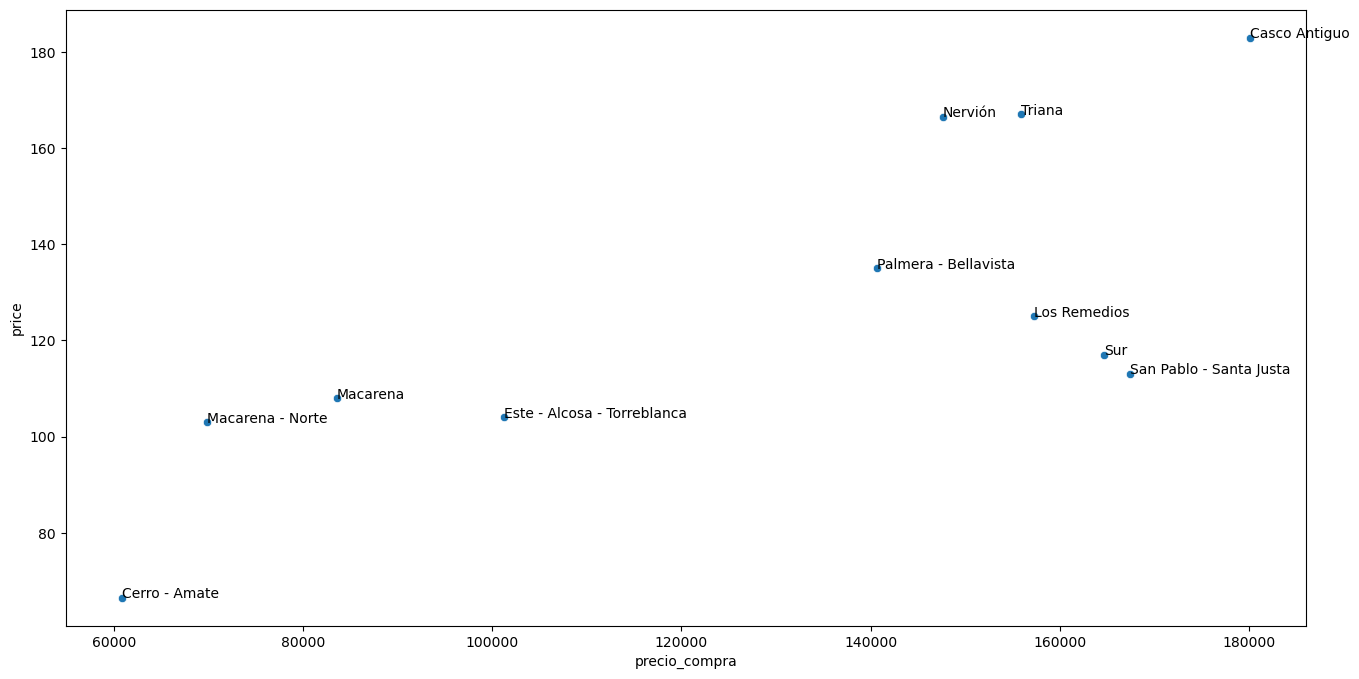

In [30]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'price')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra.iloc[cada], temp.price.iloc[cada], temp.index[cada])

Se observa como existen 3 grupos claros de distritos:
- Las zonas de mayores precios de alquiler con el Casco Antiguo con precios de compra más altos y Nervión y Triana con precios de compra algo más bajos.
- Zonas de precios medios de alquiler y altos precios de compra: Palmera, Remedios, Sur, San Pablo.
- Zonas de precios bajos de alquiler y bajos precios de compra: Cerro-amate, Macarena, Sevilla Este.

### Precio alquiler por barrios

In [31]:
temp2 = df_temp.groupby('neighbourhood')[['price','precio_compra']].median()
temp2

,price,precio_compra
neighbourhood,,
Aeropuerto Viejo,228.911578,125820.0
Alfalfa,193.000000,180050.0
Amate,32.000000,60900.0
Arenal,225.000000,180050.0
Avda. de la Paz,28.000000,164700.0
...,...,...
Valdezorras,153.500000,125820.0
Villegas,37.500000,83550.0
Zodiaco,228.911578,119600.0


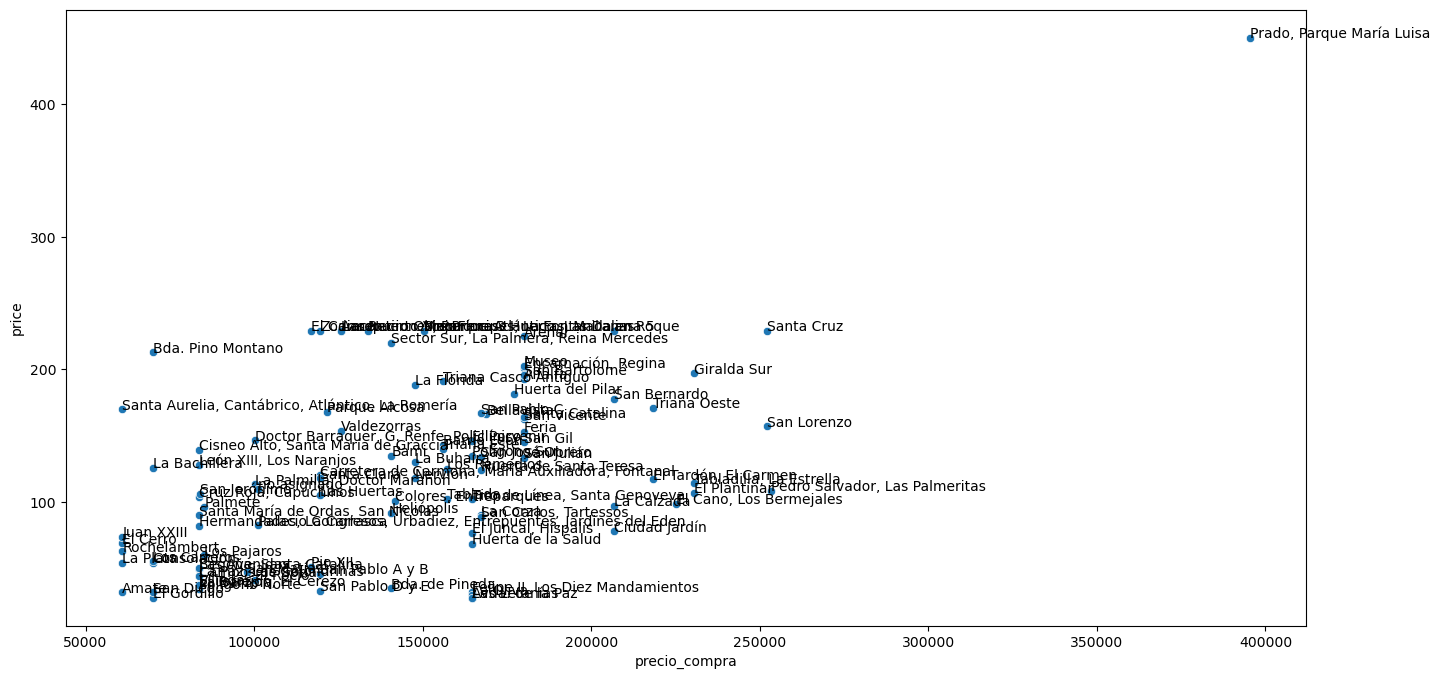

In [32]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = temp2, x = 'precio_compra', y = 'price')
#Ponemos las etiquetas
for cada in range(0,temp2.shape[0]):
    plt.text(temp2.precio_compra.iloc[cada], temp2.price.iloc[cada], temp2.index[cada])

Llama la atención el barrio de Padro y parque Maria Luisa que como habiamos visto tiene altos precios de alquiler pero tambien de compra. Hacemos zoom para ver los distritos con menor precio de compra y mayor precio de alquiler e intentar encontrar nuevos patrones.

In [33]:
temp3 = temp2.loc[(temp2['precio_compra'] < 150000) & (temp2['price'] >150) & (temp2['price']< 300)]
temp3

,price,precio_compra
neighbourhood,,
Aeropuerto Viejo,228.911578,125820.0
Bda. Pino Montano,212.955789,69900.0
El Carmen,228.911578,116970.0
La Florida,188.500000,147650.0
"Las Naciones, Parque Atlántico, Las Dalias",228.911578,125820.0
Parque Alcosa,168.000000,121500.0
Retiro Obrero,228.911578,133680.0
"Santa Aurelia, Cantábrico, Atlántico, La Romería",170.000000,60900.0
"Sector Sur, La Palmera, Reina Mercedes",220.000000,140700.0


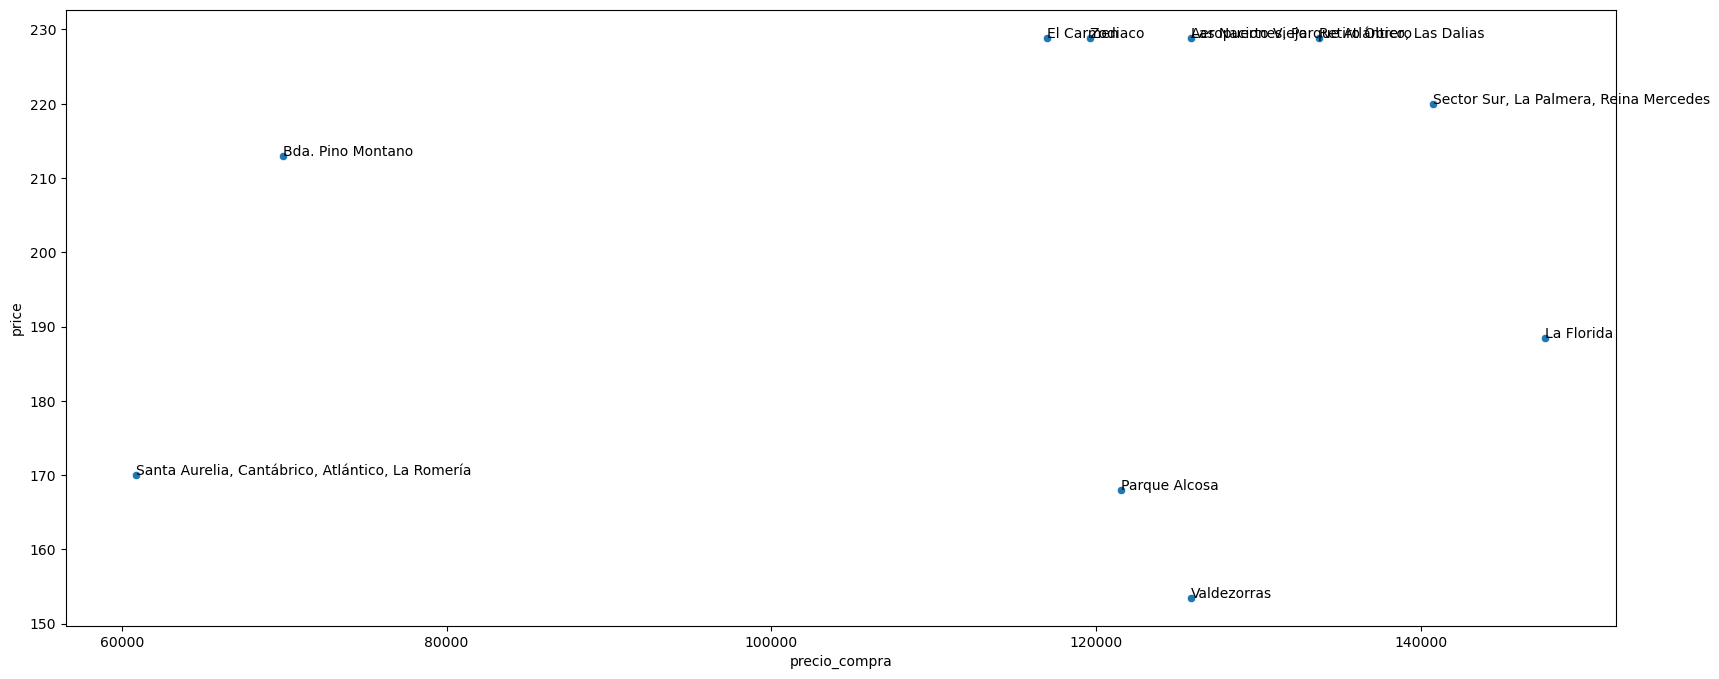

In [34]:
plt.figure(figsize = (20,8))
sns.scatterplot(data = temp3, x = 'precio_compra', y = 'price')
#Ponemos las etiquetas
for cada in range(0,temp3.shape[0]):
    plt.text(temp3.precio_compra.iloc[cada], temp3.price.iloc[cada], temp3.index[cada])


Observamos que existen como 4 grupos de barrios:
- Pino Montano con altos precios de alquiler y bajos precios de compra. **Interesante información**. Analizamos en detalle esta zona.
- Santa Aurelia con precios bajos de alquiler y bajos precios de compra.
- Parque Alcosa, Valdezoraas y la Florida con bajos precios de alquiler y altos precios de compra.
- El Carmen, el Zodiaco, zona Sur, etc con precios altos de compra y de alquiler.

In [35]:
df_temp.loc[df_temp.neighbourhood == 'Bda. Pino Montano'].sort_values('price',ascending = False)

,name,neighbourhood_group,neighbourhood,room_type,description,latitude,longitude,price,minimum_nights,accommodates,bathrooms,bedrooms,beds,ocupacion,pdi_plazaesp,m2,precio_compra
3177,MonKeys Apartments PinoLoft Nuevo Torneo I,Macarena - Norte,Bda. Pino Montano,Entire home/apt,NaN,37.425030,-5.967890,236.000000,2,3,1.0,1.0,2.0,48,5.586850,50,69900
1420,Pino Suite,Macarena - Norte,Bda. Pino Montano,Private room,Private room with a king size bed and a privat...,37.427433,-5.966229,228.911578,2,2,1.0,1.0,1.0,99,5.886350,50,69900
3178,MonKeys Apartments PinoLoft Nuevo Torneo II,Macarena - Norte,Bda. Pino Montano,Entire home/apt,NaN,37.424940,-5.966180,197.000000,2,3,1.0,1.0,2.0,46,5.625093,50,69900
4616,Piso zona macarena,Macarena - Norte,Bda. Pino Montano,Entire home/apt,Relax and unwind at this quiet and stylish home.,37.426427,-5.967661,149.000000,3,4,1.0,2.0,2.0,80,5.741078,70,97860


Comprobamos que se tratan de inmuebles de una sola habitación y un solo baño. Vemos que dos de ellos están regentados por una empresa llamada Monkeys Apartments que ofrecen sus servicios en Booking : https://www.booking.com/hotel/es/monkeys-apartments-hilton.es.html?aid=356980&label=gog235jc-1FCAsoRkIZbW9ua2V5cy1hcGFydG1lbnRzLWhpbHRvbkgKWANoRogBAZgBCrgBF8gBDNgBAegBAfgBAogCAagCA7gCndT6swbAAgHSAiRkOWQ0NWEzMi1hODcwLTRkNDYtODA0OC1jY2UyNmIwZDBhNTbYAgXgAgE&sid=a8b30d42b6f56cc90d9d42208ec5f43b&age=4;age=7;all_sr_blocks=838578703_387060600_2_0_0_265404%2C838578701_387060600_2_0_0_265404;checkin=2024-08-13;checkout=2024-08-18;dest_id=-402849;dest_type=city;dist=0;group_adults=2;group_children=2;hapos=1;highlighted_blocks=838578703_387060600_2_0_0_265404%2C838578701_387060600_2_0_0_265404;hpos=1;matching_block_id=838578703_387060600_2_0_0_265404;no_rooms=1;req_adults=2;req_age=4;req_age=7;req_children=2;room1=A%2CA%2C4%2C7;sb_price_type=total;sr_order=popularity;sr_pri_blocks=838578703_387060600_2_0_0_265404_41699%2C838578701_387060600_2_0_0_265404_41995;srepoch=1719577567;srpvid=2480568ff30a004f;type=total;ucfs=1&#hotelTmpl

Se observa que se trata de locales que han sido reformados para alquiler de apartamentos turísticos y por los comentarios son bastantes cómodos, modernos y agradables.

**Insight 2: La barriada de Pino Montano ofrece precios de alquiler altos y precios de compras bajos que pueden dar mucha rentabilidad. Se observa que existen locales que se pueden reformar para alquiler a buen precio. Se trata de inmuebles pequeños que tienen una sola habitación, un baño y permiten alojamiento para solo dos personas, tres como mucho.**

### ¿Qué factores (a parte de la localización determinan el precio del alquiler?

Para responder a esta pregunta podemos construir un minicubo, pero primero debemos discretizar nuestras variables de análisis. En nuestro caso las candidatas para este análisis son: accommodates, bedrooms, y beds.

#### Discretizar bedrooms

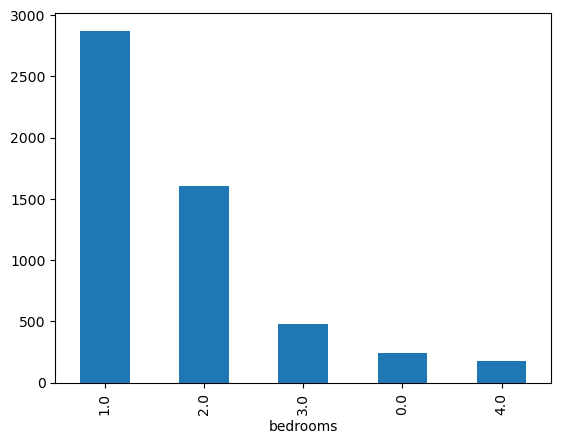

In [36]:
df_temp.bedrooms.value_counts().plot.bar();

In [37]:
condiciones = [(df_temp.bedrooms == 0) | (df_temp.bedrooms == 1),
               (df_temp.bedrooms == 2),
               (df_temp.bedrooms == 3),
               (df_temp.bedrooms > 3)]

resultados = ['01_Cero_Una','02_Dos','03_Tres','04_Cuatro o mas']

df_temp['bedrooms_disc'] = np.select(condiciones, resultados, default = -999)

In [38]:
df_temp.bedrooms_disc.value_counts()

bedrooms_disc
01_Cero_Una        3117
02_Dos             1604
03_Tres             481
04_Cuatro o mas     178
Name: count, dtype: int64

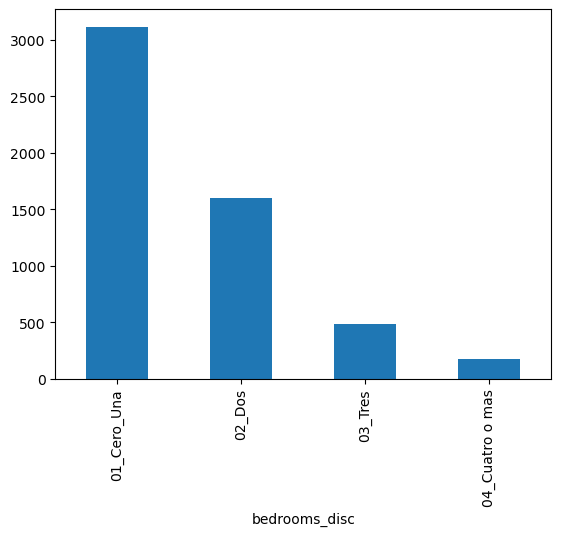

In [39]:
df_temp.bedrooms_disc.value_counts().plot.bar();

#### Discretizar accommodates y beds

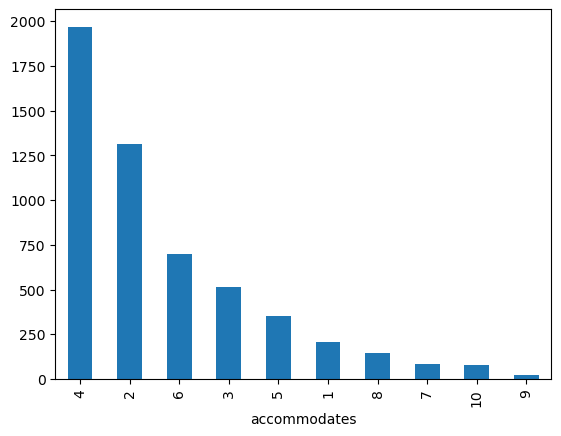

In [40]:
df_temp.accommodates.value_counts().plot.bar();

In [41]:
condiciones = [(df_temp.accommodates <= 3),
               (df_temp.accommodates == 4),
               (df_temp.accommodates >= 5)]

resultados = ['0-3','4','>5']

df_temp['accommodates_disc'] = np.select(condiciones, resultados, default = -999)

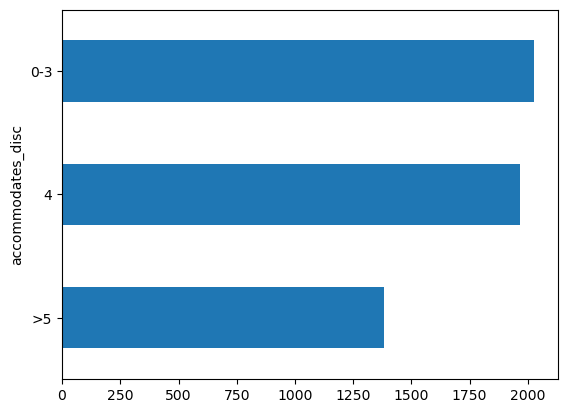

In [42]:
df_temp['accommodates_disc'].value_counts().sort_index(ascending = False).plot.barh();

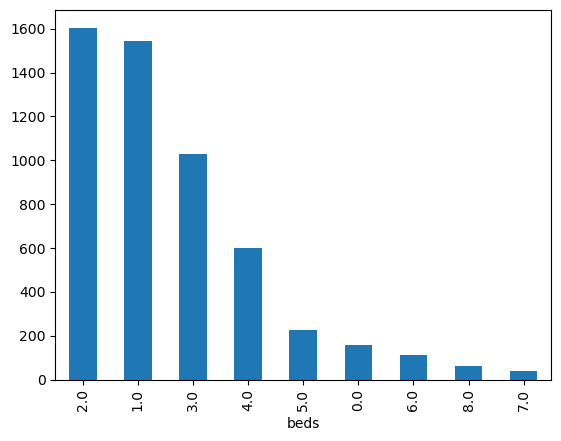

In [43]:
df_temp.beds.value_counts().plot.bar();

In [44]:
condiciones = [(df_temp.beds <= 2),
               (df_temp.beds == 2) | (df_temp.beds == 3),
               (df_temp.beds >= 4)]

resultados = ['0-1','2-3','>3']

df_temp['beds_disc'] = np.select(condiciones, resultados, default = -999)

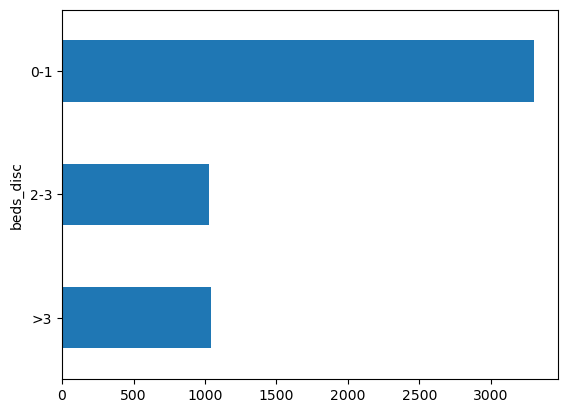

In [45]:
df_temp['beds_disc'].value_counts().sort_index(ascending = False).plot.barh();

#### Minicubo

In [46]:
#Paso 1: Seleccionar qué variables serán la métricas y cuales las dimensiones
metricas = ['price','precio_compra']
dimensiones = ['bedrooms_disc','accommodates_disc','beds_disc']

minicubo_precio = df_temp[dimensiones + metricas]
minicubo_precio

,bedrooms_disc,accommodates_disc,beds_disc,price,precio_compra
0,01_Cero_Una,0-3,0-1,59.0,180050
1,01_Cero_Una,4,0-1,253.0,180050
2,01_Cero_Una,0-3,0-1,42.0,180050
3,01_Cero_Una,0-3,0-1,35.0,155900
4,01_Cero_Una,0-3,0-1,76.0,180050
...,...,...,...,...,...
5375,01_Cero_Una,0-3,2-3,167.0,180050
5376,01_Cero_Una,4,0-1,137.0,119600
5377,02_Dos,0-3,2-3,42.0,167440
5378,01_Cero_Una,4,0-1,116.0,180050


In [47]:
#Paso 2: pasar a transaccional las dimensiones
minicubo_precio = minicubo_precio.melt(id_vars=['price','precio_compra'])
minicubo_precio

,price,precio_compra,variable,value
0,59.0,180050,bedrooms_disc,01_Cero_Una
1,253.0,180050,bedrooms_disc,01_Cero_Una
2,42.0,180050,bedrooms_disc,01_Cero_Una
3,35.0,155900,bedrooms_disc,01_Cero_Una
4,76.0,180050,bedrooms_disc,01_Cero_Una
...,...,...,...,...
16135,167.0,180050,beds_disc,2-3
16136,137.0,119600,beds_disc,0-1
16137,42.0,167440,beds_disc,2-3
16138,116.0,180050,beds_disc,0-1


In [48]:
#Paso 3: Agregar las métricas por "variable" y "valor" con las funciones deseadas
minicubo_precio = minicubo_precio.groupby(['variable','value'])[['price','precio_compra']].agg('median')
minicubo_precio

price  precio_compra
variable          value                                
accommodates_disc 0-3              116.0       180050.0
                  4                185.5       180050.0
                  >5               240.5       252070.0
bedrooms_disc     01_Cero_Una      140.0       180050.0
                  02_Dos           214.0       252070.0
                  03_Tres          242.0       324090.0
                  04_Cuatro o mas  424.5       432120.0
beds_disc         0-1              145.0       180050.0
                  2-3              206.0       252070.0
                  >3               250.0       252070.0

Analizamos cada variable sobre el cubo.

##### Analizamos habitaciones del minicubo

In [49]:
minicubo_precio.loc['bedrooms_disc']

,price,precio_compra
value,,
01_Cero_Una,140.0,180050.0
02_Dos,214.0,252070.0
03_Tres,242.0,324090.0
04_Cuatro o mas,424.5,432120.0


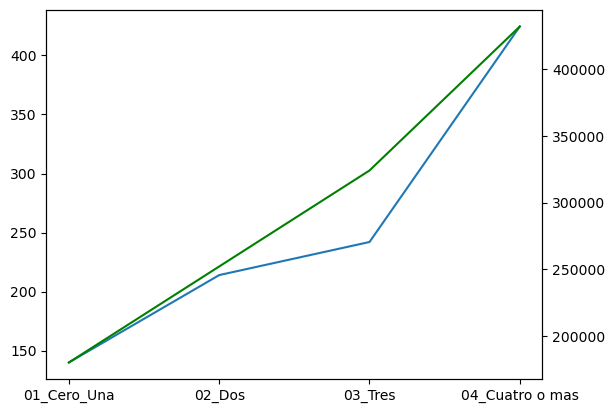

In [50]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['bedrooms_disc'].price)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['bedrooms_disc'].precio_compra,color = 'green');

En cuanto al número de habitaciones observamos que las viviendas que tienen 3 habitaciones sufren una ligera bajada en el precio de alquiler pero no ocurre en el precio de compra, lo cual indica que no son recomendados estos tipos de viviendas ya que no tendrán la misma rentabilidad que las viviendas con cero, una o dos habitaciones, que normalmente son las que más se suelen alquilar en temas turísticos.

**Insight 3: El número de habitaciones a evitar en las viviendas es 3.**

##### Analizamos camas del minicubo

In [51]:
minicubo_precio.loc['beds_disc']

,price,precio_compra
value,,
0-1,145.0,180050.0
2-3,206.0,252070.0
>3,250.0,252070.0


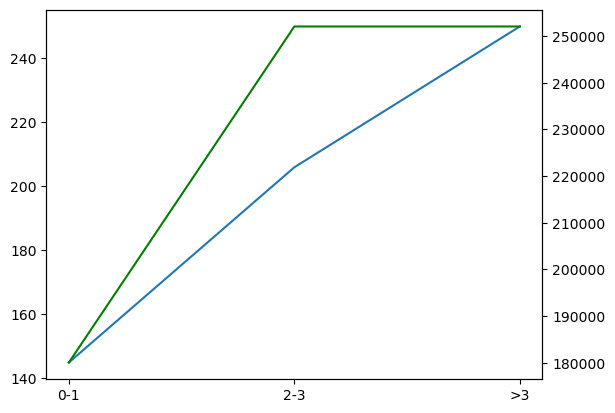

In [52]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['beds_disc'].price)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['beds_disc'].precio_compra,color = 'green');

En cuanto al número de camas vemos que tienen el mismo precio de compra las viviendas con dos camas o más pero el precio de alquiler no es equitativo y es menor en viviendas de dos camas.

**Insight 4: el número de camas a evitar es 2-3**. O bien ponemos una cama o intentamos meter todas las posibles.

¿Podría ser que los propietarios estén intentando meter muchas más camas que habitaciones para maximizar el ingreso?

Veámoslo por ejemplo con los pisos de una habitación:

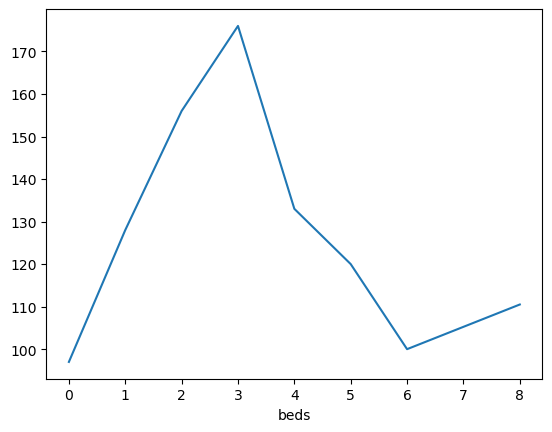

In [53]:
df_temp[df_temp.bedrooms == 1].groupby('beds').price.median().plot();

In [54]:
pd.set_option('display.max_colwidth',100)

In [55]:
df_temp.loc[(df_temp.bedrooms == 1)& (df_temp.beds > 4)]

,name,neighbourhood_group,neighbourhood,room_type,description,latitude,longitude,price,minimum_nights,accommodates,bathrooms,bedrooms,beds,ocupacion,pdi_plazaesp,m2,precio_compra,bedrooms_disc,accommodates_disc,beds_disc
301,House from XVII century,Casco Antiguo,San Vicente,Entire home/apt,"Seville and historic home located on the old Almohad wall in the old town, with all the characte...",37.394210,-6.001070,120.0,2,4,1.0,1.0,5.0,38,2.262877,50,180050,01_Cero_Una,4,>3
570,"Centro, junto plaza de España- Amarilla",Sur,El Porvenir,Private room,Places of interest: restaurants and food and food and art and culture. You will love my place be...,37.372000,-5.983110,58.0,1,6,1.0,1.0,5.0,2,0.673693,50,164700,01_Cero_Una,>5,>3
903,"PRIVATE, PARKING FREE. APT.JUST HITORICAL CENTER",Casco Antiguo,San Vicente,Entire home/apt,"Apartment on the outside first floor, with elevator. Free covered parking spot.<br />Flexible ch...",37.395060,-5.996730,300.0,3,6,1.0,1.0,6.0,2,2.164868,50,180050,01_Cero_Una,>5,>3
990,Betis Beautiful Views Fantastic Location 4 pax,Casco Antiguo,Arenal,Entire home/apt,"Located in one of the most beautiful streets of Seville, Betis Beautiful Views 4 pax is an excep...",37.385310,-6.000590,134.0,3,4,2.0,1.0,6.0,11,1.498414,50,180050,01_Cero_Una,4,>3
1074,Welcoming room with terrace,Sur,El Porvenir,Private room,"The house is located in one of the most beautiful areas of Seville, next to the main park of the...",37.372170,-5.982990,170.0,1,4,1.0,1.0,8.0,1,0.663349,50,164700,01_Cero_Una,4,>3
2045,Solárium en Ático duplex .Home Francos 22.,Casco Antiguo,Alfalfa,Entire home/apt,"Penthouse, 145 meters divided into two floors with terrace. <br />Excellent location , in one of...",37.389540,-5.991750,143.0,2,5,1.0,1.0,5.0,68,1.436423,50,180050,01_Cero_Una,>5,>3
2198,Habitación independiente y con terraza privada.,Sur,El Porvenir,Private room,"The room is located on the first floor, on a terrace independent from the rest of the house and ...",37.373290,-5.982890,61.0,1,4,1.0,1.0,5.0,6,0.568738,50,164700,01_Cero_Una,4,>3
2318,LAS SETAS- Ático con terraza,Casco Antiguo,"Encarnación, Regina",Entire home/apt,"Penthouse Terrace OF THE MUSHROOMS, is a 2-story penthouse with a splendid fully equipped privat...",37.394430,-5.991460,246.0,2,8,1.5,1.0,8.0,93,1.958392,50,180050,01_Cero_Una,>5,>3
2639,Cama en Dormitorio Compartido Femenino 6 personas,Casco Antiguo,Arenal,Shared room,"Hostel in the heart of the city center created by travelers, for all those who want to enjoy a q...",37.387510,-5.996020,100.0,1,1,1.0,1.0,6.0,7,1.395296,50,180050,01_Cero_Una,0-3,>3
2640,Cama en Dormitorio Compartido Mixto de 6 personas,Casco Antiguo,Arenal,Shared room,"Hostel in the heart of the city center created by travelers, for all those who want to enjoy a q...",37.386990,-5.996340,100.0,1,1,1.0,1.0,6.0,7,1.364790,50,180050,01_Cero_Una,0-3,>3


Comprobamos que efectivamente existen viviendas de una o ninguna habitación donde se meten muchas camas y se permite el alojamiento a varios huespedes. La mayoría localizadas en la zona centro de la ciudad.

##### Analizamos huespedes del minicubo

In [56]:
minicubo_precio.loc['accommodates_disc']

,price,precio_compra
value,,
0-3,116.0,180050.0
4,185.5,180050.0
>5,240.5,252070.0


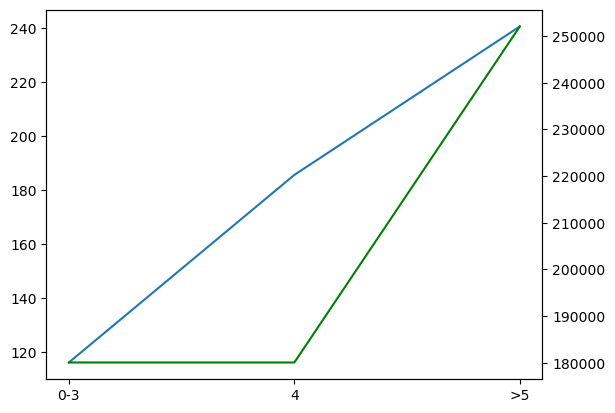

In [57]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['accommodates_disc'].price)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['accommodates_disc'].precio_compra,color = 'green');

**Insight 5: el número óptimo de huéspedes está en 3, ya el precio de los inmuebles para acomodar 3 es el mismo que para acomodar 1 o 2. A partir de 4 el piso necesita ser mayor y el precio de compra se incrementa bastante**

### Análisis por punto de interés

In [58]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5380 entries, 0 to 5379
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 5380 non-null   object 
 1   neighbourhood_group  5380 non-null   object 
 2   neighbourhood        5380 non-null   object 
 3   room_type            5380 non-null   object 
 4   description          5224 non-null   object 
 5   latitude             5380 non-null   float64
 6   longitude            5380 non-null   float64
 7   price                5380 non-null   float64
 8   minimum_nights       5380 non-null   int64  
 9   accommodates         5380 non-null   int64  
 10  bathrooms            5380 non-null   float64
 11  bedrooms             5380 non-null   float64
 12  beds                 5380 non-null   float64
 13  ocupacion            5380 non-null   int64  
 14  pdi_plazaesp         5380 non-null   float64
 15  m2                   5380 non-null   i

In [59]:
df_temp.groupby('neighbourhood_group').pdi_plazaesp.median().sort_values()

neighbourhood_group
Sur                            0.946275
Los Remedios                   1.086451
Nervión                        1.311812
Casco Antiguo                  1.752706
Triana                         1.796397
Palmera - Bellavista           2.137398
San Pablo - Santa Justa        2.337406
Cerro - Amate                  3.066961
Macarena                       3.243946
Macarena - Norte               5.111544
Este - Alcosa - Torreblanca    5.894217
Name: pdi_plazaesp, dtype: float64

In [60]:
df_temp.groupby('neighbourhood_group').pdi_plazaesp.median().sort_values()[0:5].index.to_list()

['Sur', 'Los Remedios', 'Nervión', 'Casco Antiguo', 'Triana']

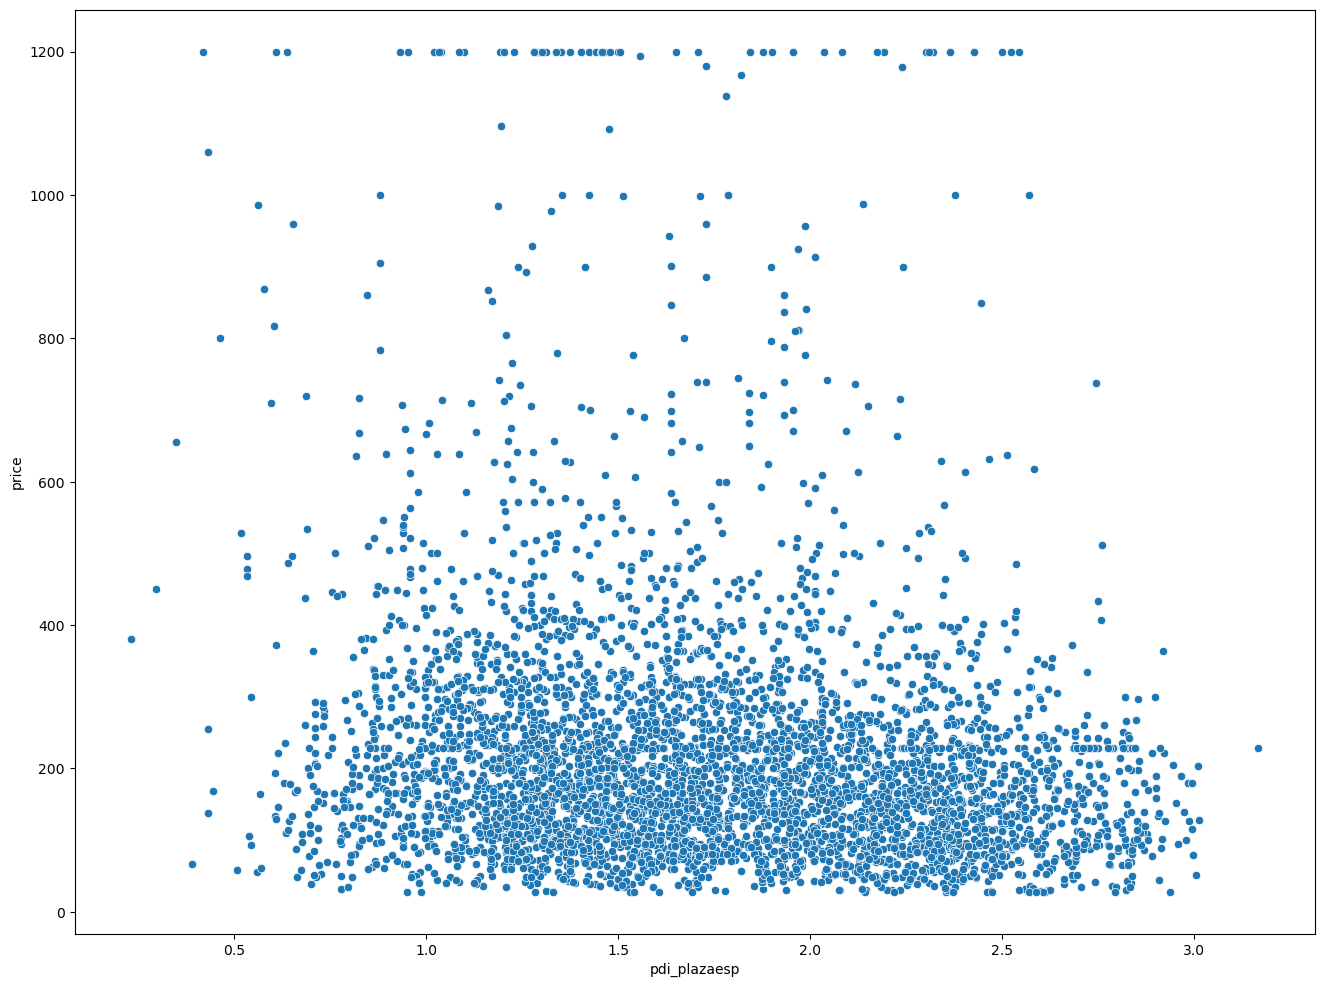

In [61]:
seleccion = df_temp.groupby('neighbourhood_group').pdi_plazaesp.median().sort_values()[0:5].index.to_list()

plt.figure(figsize = (16,12))
sns.scatterplot(data = df_temp.loc[df_temp.neighbourhood_group.isin(seleccion)], x = 'pdi_plazaesp', y = 'price');

No parece haber una relación tan directa como sería esperable entre la distancia a la Plaza de España y el precio de alquiler.

**Insight 6: estando dentro del distrito parece que la cercanía a puntos de interés no tiene tanto impacto como sería esperable. Eso abre la puerta a buscar inmuebles que estando en un distrito céntrico no estén justo al lado del PdI y por tanto esperablemente tengan un precio de compra menor**

## Analisis sobre la ocupación

¿Cual es la ocupación media? ¿y el rango de ocupación?¿Y por distritos?¿Y por barrios?

In [62]:
df_temp.ocupacion.describe()

count    5380.000000
mean       51.596283
std        27.297869
min         0.000000
25%        29.000000
50%        52.000000
75%        74.000000
max       100.000000
Name: ocupacion, dtype: float64

Observamos que la ocupación media al año de un inmueble en Sevilla está en un 52% lo cual es un valor bastante aceptable teniendo en cuenta que habrá fechas como verano donde la ocupación baje debido a altas temperaturas de la ciudad y donde los turistas pasan poco tiempo ya que terminan yendo a zonas de playas cercanas como Cádiz o Huelva.

In [63]:
df_temp.groupby('neighbourhood_group').ocupacion.mean().sort_values(ascending = False)

neighbourhood_group
Macarena - Norte               57.116279
Macarena                       55.975490
Triana                         55.479876
Los Remedios                   54.247059
Nervión                        53.206897
Casco Antiguo                  50.951140
San Pablo - Santa Justa        50.550388
Este - Alcosa - Torreblanca    48.467742
Cerro - Amate                  48.028571
Palmera - Bellavista           43.973684
Sur                            42.835165
Name: ocupacion, dtype: float64

La ocupación media por distritos es practicamente la misma, destacando las zonas de la Macarena, Triana y Los Remedios siendo los más ocupados.

In [64]:
df_temp.groupby('neighbourhood').ocupacion.mean().sort_values(ascending = False)

neighbourhood
Aeropuerto Viejo                              86.000000
Las Naciones, Parque Atlántico, Las Dalias    82.000000
Los Príncipes, La Fontanilla                  76.200000
La Bachillera                                 75.285714
Palmete                                       73.750000
                                                ...    
San Matías                                    23.500000
El Gordillo                                   16.000000
Bda. de Pineda                                16.000000
Las Letanías                                  16.000000
Parque Alcosa                                  1.000000
Name: ocupacion, Length: 103, dtype: float64

Destaca la ocupación tal alta en barrios tal lejanos de la zona centro como el Aeropuerto Viejo, puede deberse a la cercanía al aeropuerto principal de la ciudad y que se use solo para alojarse para coger vuelos al día siguiente. Alojamientos para conexión de vuelos.

In [65]:
df_temp.loc[df_temp.neighbourhood == 'Aeropuerto Viejo'].sort_values('ocupacion',ascending = False)

,name,neighbourhood_group,neighbourhood,room_type,description,latitude,longitude,price,minimum_nights,accommodates,bathrooms,bedrooms,beds,ocupacion,pdi_plazaesp,m2,precio_compra,bedrooms_disc,accommodates_disc,beds_disc
1242,Miraflores Luxury Suites,Macarena - Norte,Aeropuerto Viejo,Entire home/apt,Don't miss the opportunity to enjoy this NEW and elegant apartment at a very special price. The ...,37.40954,-5.96541,228.911578,2,4,2.0,3.0,2.0,86,4.078015,90,125820,03_Tres,4,0-1


### Ocupación por distritos

In [66]:
temp = df_temp.groupby('neighbourhood_group')[['ocupacion','precio_compra']].median()
temp

,ocupacion,precio_compra
neighbourhood_group,,
Casco Antiguo,50.0,180050.0
Cerro - Amate,40.0,60900.0
Este - Alcosa - Torreblanca,54.0,101250.0
Los Remedios,58.0,157250.0
Macarena,59.0,83550.0
Macarena - Norte,59.0,69900.0
Nervión,55.5,147650.0
Palmera - Bellavista,50.0,140700.0
San Pablo - Santa Justa,52.0,167440.0


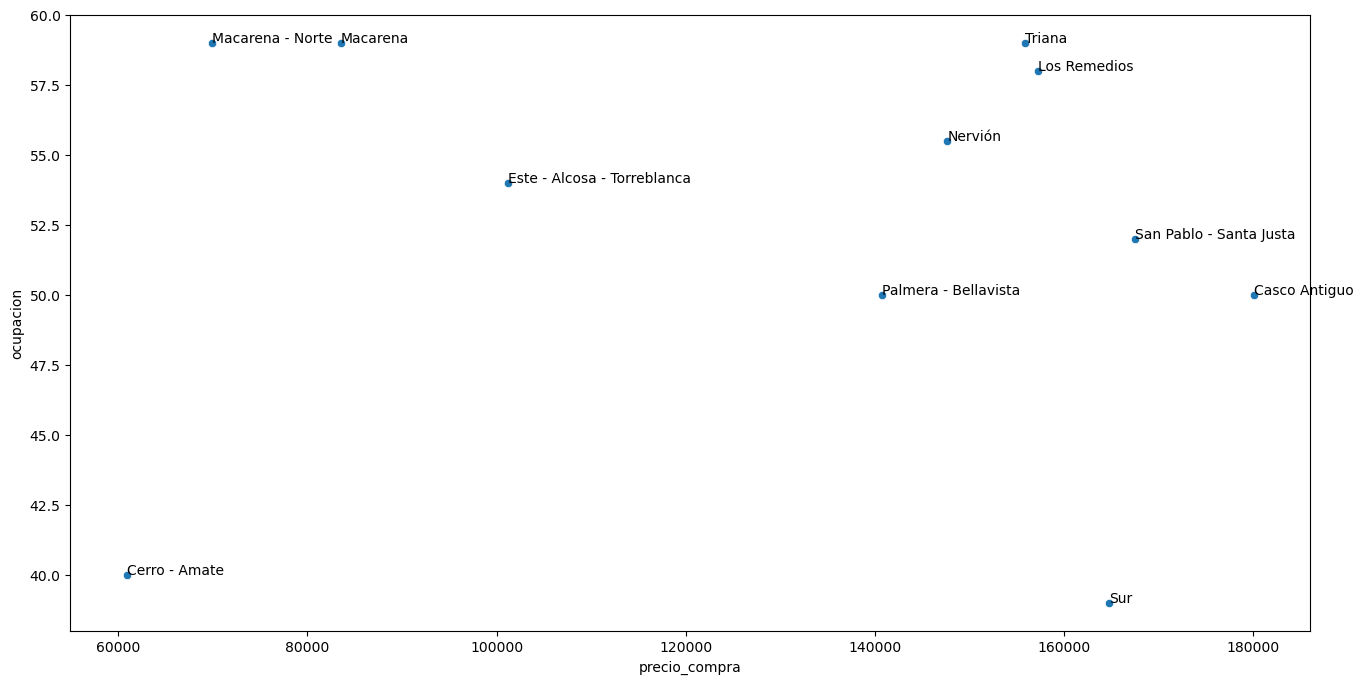

In [67]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'ocupacion')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra.iloc[cada], temp.ocupacion.iloc[cada], temp.index[cada])

**Insight 7: La zona con mayor ocupación y precios de compra más bajos es la de la Macarena (zona norte), está cerca del centro y bien conectada.**

### Ocupación por barrios

In [68]:
temp2 = df_temp.groupby('neighbourhood')[['ocupacion','precio_compra']].median()
temp2

,ocupacion,precio_compra
neighbourhood,,
Aeropuerto Viejo,86.0,125820.0
Alfalfa,53.0,180050.0
Amate,68.0,60900.0
Arenal,45.5,180050.0
Avda. de la Paz,33.0,164700.0
...,...,...
Valdezorras,41.0,125820.0
Villegas,39.0,83550.0
Zodiaco,30.0,119600.0


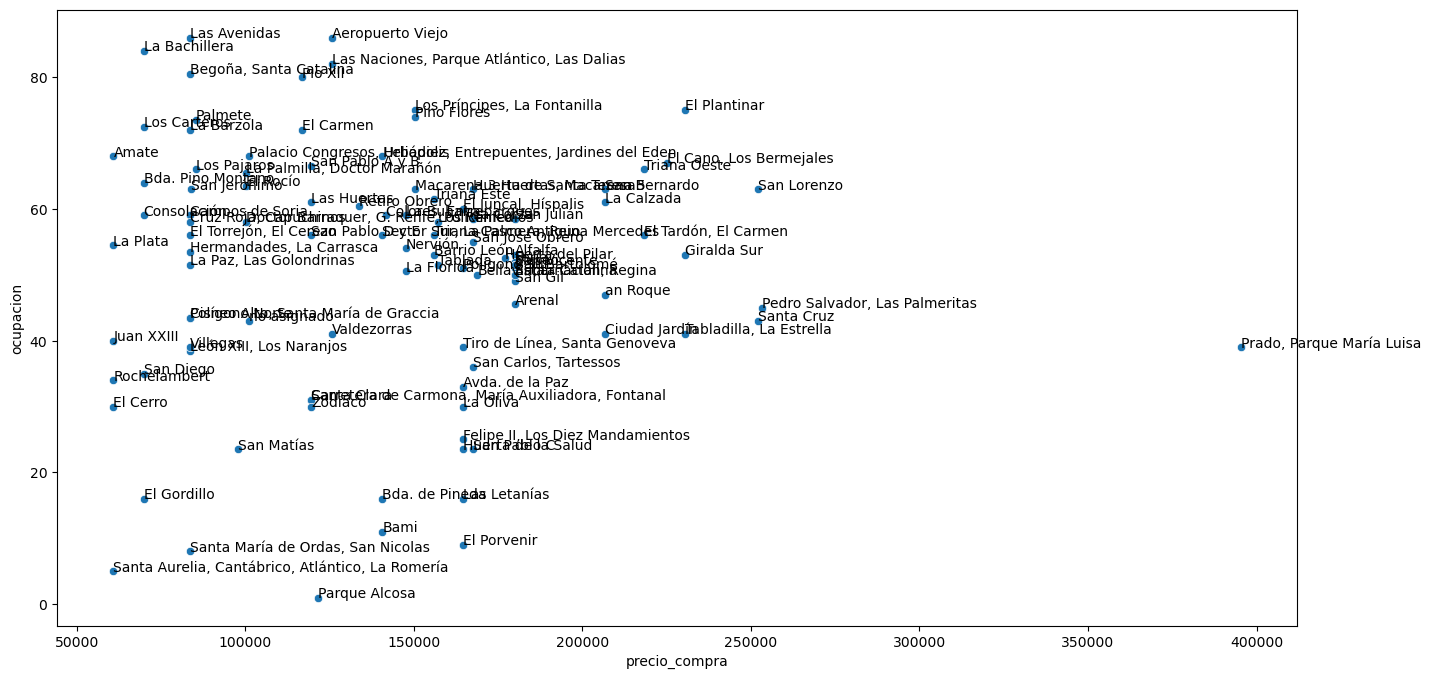

In [69]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = temp2, x = 'precio_compra', y = 'ocupacion')
#Ponemos las etiquetas
for cada in range(0,temp2.shape[0]):
    plt.text(temp2.precio_compra.iloc[cada], temp2.ocupacion.iloc[cada], temp2.index[cada])

Observamos que los barrios con mayores % de ocupación y menores precios de compra son los situados en el distrito de la Macarena (zona norte de la ciudad): La Bachillera, Aeropuerto Viejo, el Carmen, Begoña, Los príncipes, etc.

### ¿Qué factores (a parte de la localización determinan la ocupación del alquiler?

In [70]:
#Paso 1: Seleccionar qué variables serán la métricas y cuales las dimensiones
metricas = ['ocupacion','precio_compra']
dimensiones = ['bedrooms_disc','accommodates_disc','beds_disc']

minicubo_ocupacion = df_temp[dimensiones + metricas]
minicubo_ocupacion

,bedrooms_disc,accommodates_disc,beds_disc,ocupacion,precio_compra
0,01_Cero_Una,0-3,0-1,100,180050
1,01_Cero_Una,4,0-1,67,180050
2,01_Cero_Una,0-3,0-1,15,180050
3,01_Cero_Una,0-3,0-1,47,155900
4,01_Cero_Una,0-3,0-1,67,180050
...,...,...,...,...,...
5375,01_Cero_Una,0-3,2-3,50,180050
5376,01_Cero_Una,4,0-1,69,119600
5377,02_Dos,0-3,2-3,30,167440
5378,01_Cero_Una,4,0-1,26,180050


In [71]:
#Paso 2: pasar a transaccional las dimensiones
minicubo_ocupacion = minicubo_ocupacion.melt(id_vars=['ocupacion','precio_compra'])
minicubo_ocupacion

,ocupacion,precio_compra,variable,value
0,100,180050,bedrooms_disc,01_Cero_Una
1,67,180050,bedrooms_disc,01_Cero_Una
2,15,180050,bedrooms_disc,01_Cero_Una
3,47,155900,bedrooms_disc,01_Cero_Una
4,67,180050,bedrooms_disc,01_Cero_Una
...,...,...,...,...
16135,50,180050,beds_disc,2-3
16136,69,119600,beds_disc,0-1
16137,30,167440,beds_disc,2-3
16138,26,180050,beds_disc,0-1


In [72]:
#Paso 3: Agregar las métricas por "variable" y "valor" con las funciones deseadas
minicubo_ocupacion = minicubo_ocupacion.groupby(['variable','value'])[['ocupacion','precio_compra']].agg('mean')
minicubo_ocupacion

ocupacion  precio_compra
variable          value                                    
accommodates_disc 0-3              51.251972  166573.160750
                  4                52.183943  198088.460366
                  >5               51.265173  270600.997110
bedrooms_disc     01_Cero_Una      51.467116  165783.397498
                  02_Dos           52.634663  234868.198254
                  03_Tres          51.490644  286044.324324
                  04_Cuatro o mas  44.786517  399424.044944
beds_disc         0-1              51.644175  174954.045386
                  2-3              52.765049  225754.058252
                  >3               50.292823  278861.665072

#### Analizamos habitaciones del minicubo

In [73]:
minicubo_ocupacion.loc['bedrooms_disc']

,ocupacion,precio_compra
value,,
01_Cero_Una,51.467116,165783.397498
02_Dos,52.634663,234868.198254
03_Tres,51.490644,286044.324324
04_Cuatro o mas,44.786517,399424.044944


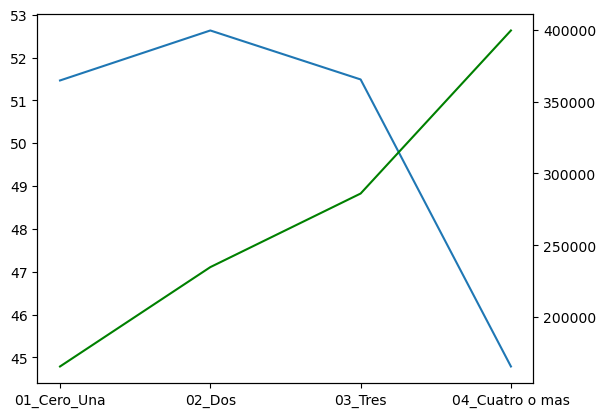

In [74]:
f, ax = plt.subplots()
ax.plot(minicubo_ocupacion.loc['bedrooms_disc'].ocupacion)
ax2 = ax.twinx()
ax2.plot(minicubo_ocupacion.loc['bedrooms_disc'].precio_compra,color = 'green');

**Insight 8: La ocupación desciende mucho si tenemos habitaciones de 3 habitaciones y los precios de compra son más altos.**

#### Analizamos camas del minicubo

In [75]:
minicubo_ocupacion.loc['beds_disc']

,ocupacion,precio_compra
value,,
0-1,51.644175,174954.045386
2-3,52.765049,225754.058252
>3,50.292823,278861.665072


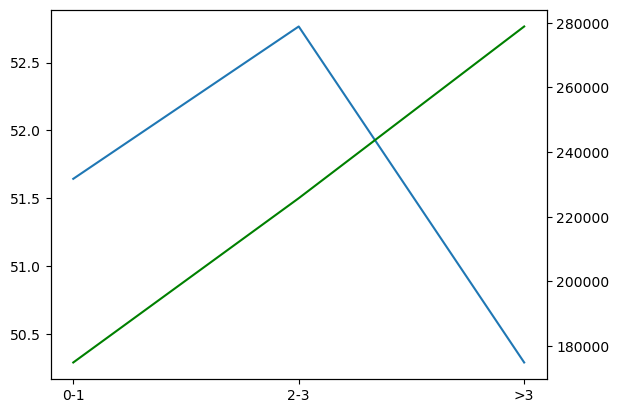

In [76]:
f, ax = plt.subplots()
ax.plot(minicubo_ocupacion.loc['beds_disc'].ocupacion)
ax2 = ax.twinx()
ax2.plot(minicubo_ocupacion.loc['beds_disc'].precio_compra,color = 'green');

**Insight 9: Las viviendas con hasta 3 camas tienen una ocupación mayor que las de más de 3 camas, el precio también aumenta bastante.**

#### Analizamos huéspedes del minicubo

In [77]:
minicubo_ocupacion.loc['accommodates_disc']

,ocupacion,precio_compra
value,,
0-3,51.251972,166573.160750
4,52.183943,198088.460366
>5,51.265173,270600.997110


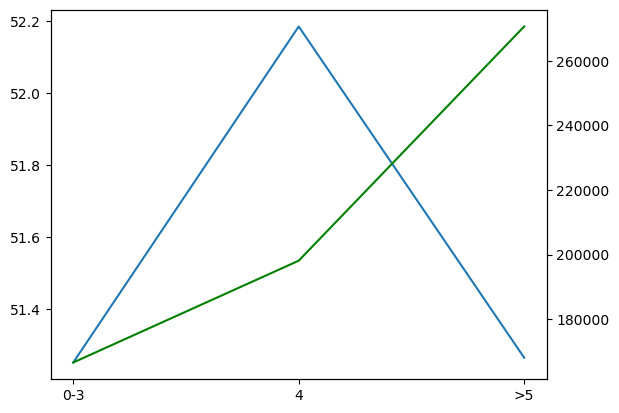

In [78]:
f, ax = plt.subplots()
ax.plot(minicubo_ocupacion.loc['accommodates_disc'].ocupacion)
ax2 = ax.twinx()
ax2.plot(minicubo_ocupacion.loc['accommodates_disc'].precio_compra,color = 'green');

**Insight 10: La mayoria de huespedes aceptables que tienen una alta ocupación del inmueble son de 4 huéspedes, ya que a partir de ahí la ocupación baja bastante**

### Análisis por punto de interés

In [79]:
df_temp.groupby('neighbourhood_group').pdi_plazaesp.mean().sort_values()

neighbourhood_group
Sur                            1.118964
Los Remedios                   1.156164
Nervión                        1.316141
Triana                         1.771422
Casco Antiguo                  1.801957
San Pablo - Santa Justa        2.486621
Palmera - Bellavista           2.949747
Cerro - Amate                  3.096853
Macarena                       3.245413
Macarena - Norte               5.336391
Este - Alcosa - Torreblanca    5.948569
Name: pdi_plazaesp, dtype: float64

In [80]:
df_temp.groupby('neighbourhood_group').pdi_plazaesp.mean().sort_values()[0:5].index.to_list()

['Sur', 'Los Remedios', 'Nervión', 'Triana', 'Casco Antiguo']

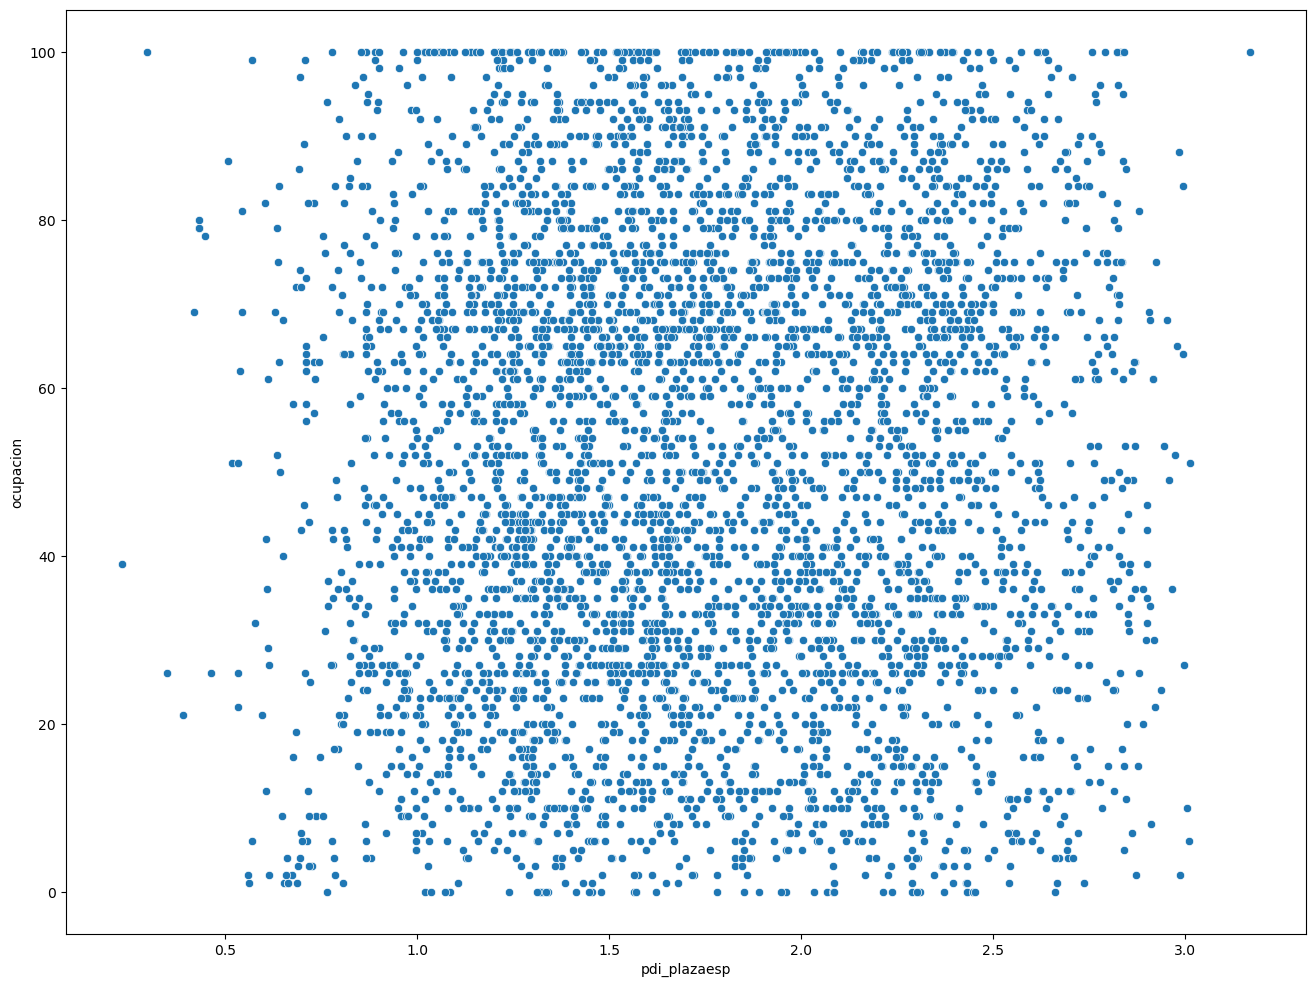

In [81]:
seleccion = df_temp.groupby('neighbourhood_group').pdi_plazaesp.mean().sort_values()[0:5].index.to_list()

plt.figure(figsize = (16,12))
sns.scatterplot(data = df_temp.loc[df_temp.neighbourhood_group.isin(seleccion)], x = 'pdi_plazaesp', y = 'ocupacion');

Al igual que con el precio, el punto de interés no afecta en la variable ocupación y se podrían comprar inmuebles que no estén cerca del punto de interés y tenga una alta ocupación.

## Análisis geográfico sobre un mapa

In [83]:
import folium

Vamos a usar las coordenadas de la Plaza de España que ya teníamos.

Vamos a analizar visualmente el insight sobre el distrito de la Macarena y Macarena - zona norte.

Vamos a crear una nueva variable discretizada y cambiaremos el marcador a un círculo de colores siendo la interpretación lo siguiente:
- Puntos amarillos y verdes: inmuebles con precios de alquiler más bajos.
- Puntos azules y rojos: inmuebles con precios de alquiler más altos.

In [93]:
datos = df_temp.loc[(df_temp['neighbourhood_group'] == 'Macarena - Norte') | (df_temp['neighbourhood_group'] == 'Macarena')].copy()

In [95]:
datos['price_disc'] = pd.qcut(datos['price'], q = [0, .25, .5, .75, 1.], 
                              labels=['yellow', 'green', 'blue', 'red'])

In [96]:
mapa = folium.Map(location=[37.3771699330896, -5.9870810323649035],zoom_start=12)

for piso in range(0,len(datos)):
   folium.CircleMarker(
      location = [datos.iloc[piso]['latitude'], datos.iloc[piso]['longitude']],
      popup = datos.iloc[piso]['price'],
      fill=True,
      color = datos.iloc[piso]['price_disc'],
      fill_opacity=1,
      radius = 5
   ).add_to(mapa)

mapa

**Insight 11 : Se observa como los puntos amarillos son los que están más alejados de la zona centro pero existen una gran cantidad de puntos verdes cercanos al Casco Antiguo de la ciudad, rodeados de puntos mayoritariamente azules, lo cual puede indicar que todavía existe potencial para explotar esta zona de la ciudad.**

# SEPARAR NUMÉRICAS Y CATEGÓRICAS

## Categóricas

In [82]:
cat = df_temp.select_dtypes(exclude = 'number').copy()

In [83]:
#Eliminamos las variables que hemos discretizado para el análisis y la descripción y el nombre
cat = cat.drop(columns = ['description','bedrooms_disc','accommodates_disc','beds_disc','name'])

## Numéricas

In [84]:
num = df_temp.select_dtypes(include='number').copy()

In [85]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5380 entries, 0 to 5379
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        5380 non-null   float64
 1   longitude       5380 non-null   float64
 2   price           5380 non-null   float64
 3   minimum_nights  5380 non-null   int64  
 4   accommodates    5380 non-null   int64  
 5   bathrooms       5380 non-null   float64
 6   bedrooms        5380 non-null   float64
 7   beds            5380 non-null   float64
 8   ocupacion       5380 non-null   int64  
 9   pdi_plazaesp    5380 non-null   float64
 10  m2              5380 non-null   int32  
 11  precio_compra   5380 non-null   int64  
dtypes: float64(7), int32(1), int64(4)
memory usage: 483.5 KB


# EDA

## EDA CATEGÓRICAS

### Análisis estadístico

Aqui se trata de analizar los tipos de categorias que tienen cada variables, si hay algunos raros como los unknown, si hay categorias con pocos datos que sea raro desde el punto de vista de negocio, etc.

In [86]:
def frecuencias_cat(df_cat):
    resultado = df_cat.apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor',0: "Frecuencia"})\
                .sort_values(by = ['Variable','Frecuencia'])
    return(resultado)

In [87]:
frecuencias_cat(cat)

,Variable,Valor,Frecuencia
11,neighbourhood,Aeropuerto Viejo,0.000186
15,neighbourhood,Avda. de la Paz,0.000186
19,neighbourhood,Bda. de Pineda,0.000186
33,neighbourhood,El Gordillo,0.000186
62,neighbourhood,Las Letanías,0.000186
...,...,...,...
10,neighbourhood_group,Triana,0.120074
0,neighbourhood_group,Casco Antiguo,0.684758
116,room_type,Shared room,0.003717
115,room_type,Private room,0.153532


### Análisis gráfico

In [88]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

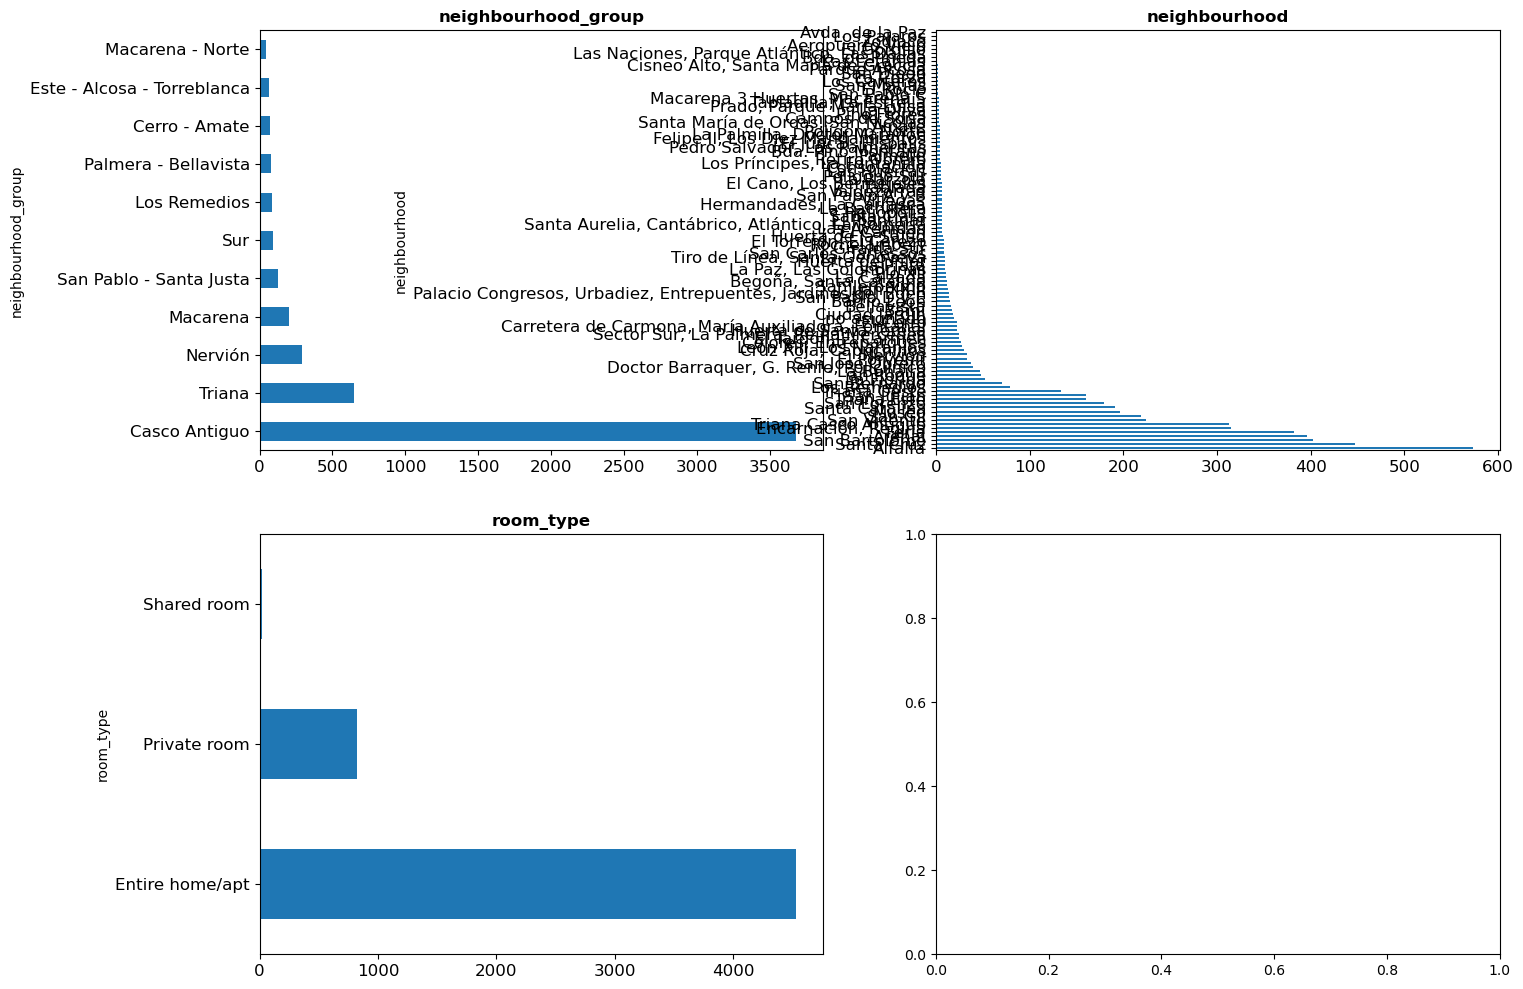

In [89]:
graficos_eda_categoricos(cat)

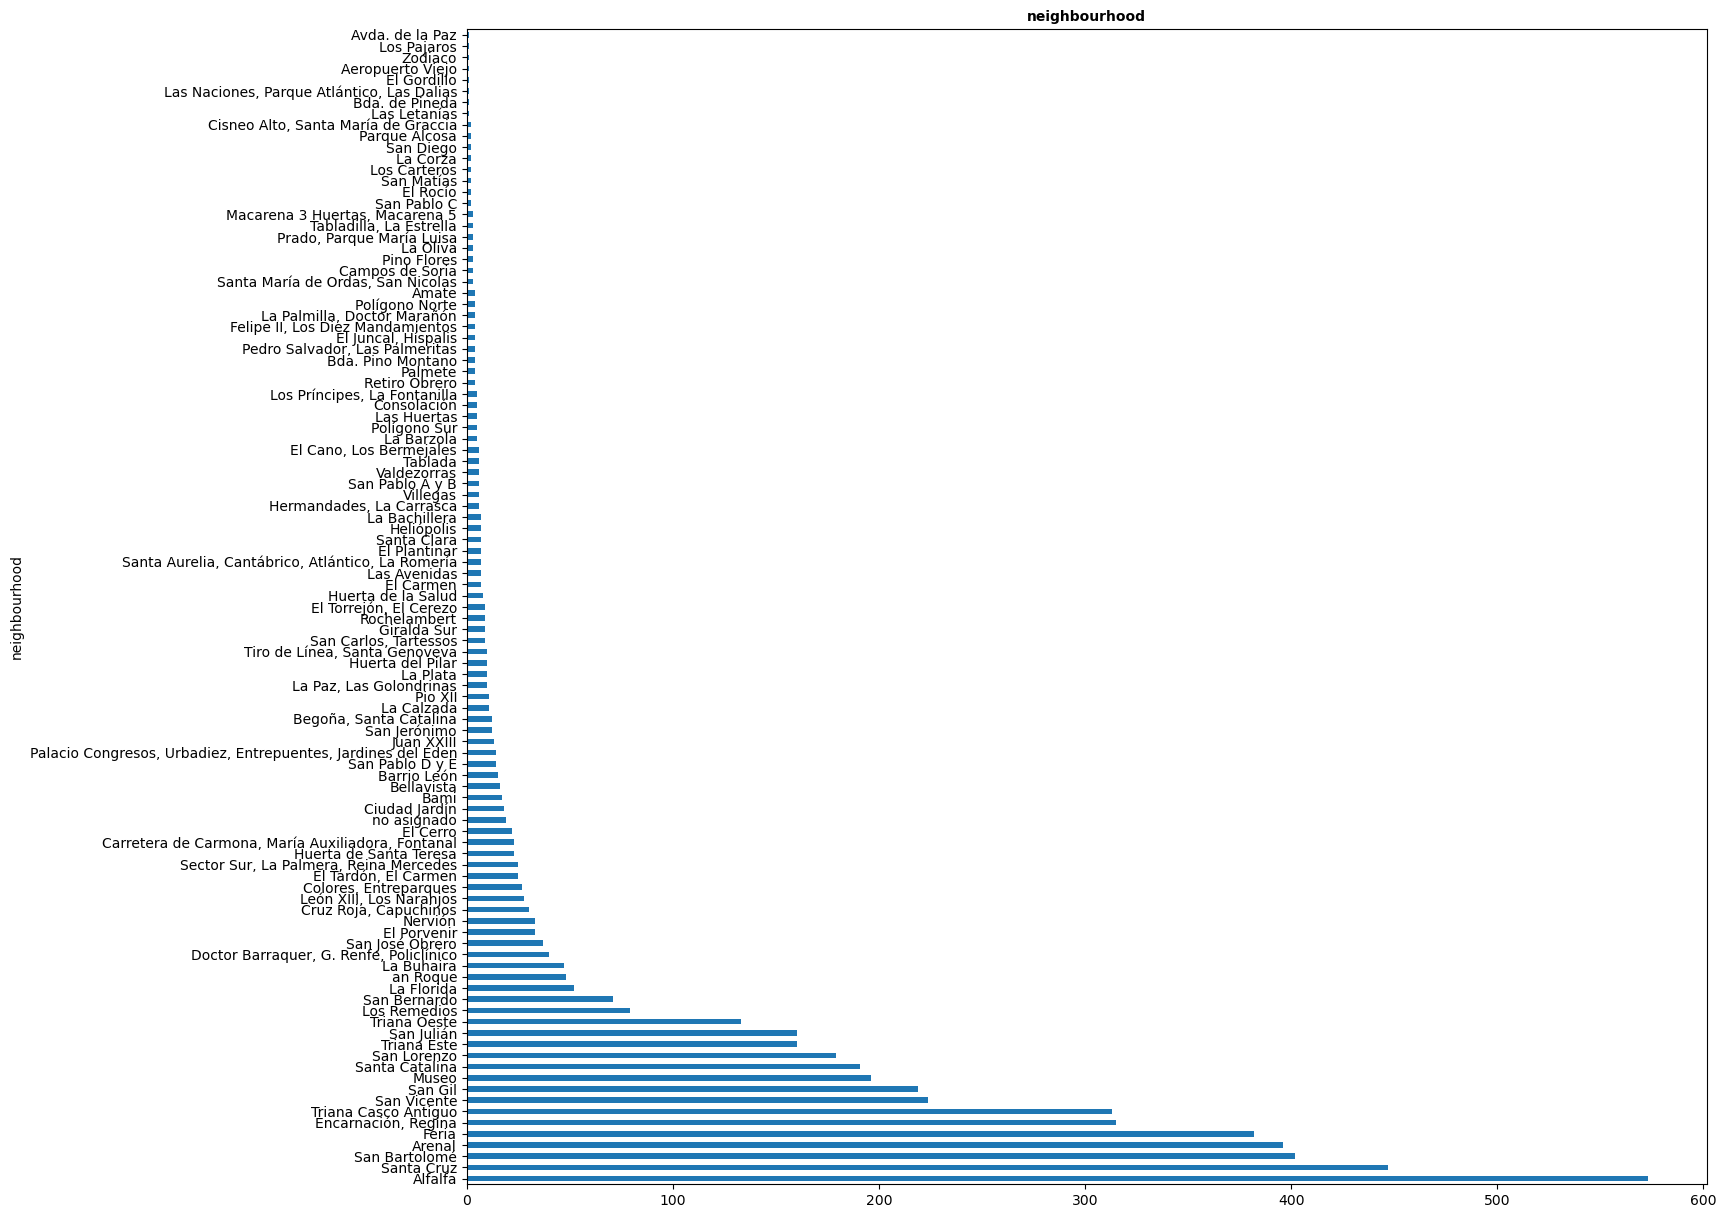

In [90]:
#Vemos el gráfico de barriada por separado para que se vea mejor
f, ax = plt.subplots(figsize = (16, 15))

cat['neighbourhood'].value_counts().plot.barh() \
.set_title('neighbourhood', fontsize = 10, fontweight = "bold");                                       

Observamos:

1. En la variable de grupo de distrito o vecindad, la zona más demandada es la zona Centro de la ciudad seguidos de barrios cerca del centro y famosos en la ciudad como Triana, Nervión y Macarena.
2. La variable vecindad tiene sus máximos en barrios de la zona centro de la ciudad como la Alfalfa, Santa Cruz, San Bartolomé y el Arenal.
3. La variable de tipo de habitación tiene sus valores máximos en viviendas enteras o habitaciones privadas que es lo más demandado en AirBnB.

## EDA NUMÉRICAS

### Análisis estadístico

In [93]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [94]:
estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
latitude,5380.0,37.390321,37.390151,0.009340,37.318174,37.386120,37.390151,37.395850,37.433200
longitude,5380.0,-5.990743,-5.992250,0.012180,-6.016641,-5.997443,-5.992250,-5.986840,-5.902490
price,5380.0,211.769274,172.000000,175.981292,28.000000,106.000000,172.000000,251.000000,1200.000000
minimum_nights,5380.0,2.825093,2.000000,7.385419,1.000000,1.000000,2.000000,2.000000,60.000000
accommodates,5380.0,3.892193,4.000000,1.784311,1.000000,2.000000,4.000000,5.000000,10.000000
bathrooms,5380.0,1.294424,1.000000,0.576808,0.500000,1.000000,1.000000,1.500000,4.000000
bedrooms,5380.0,1.531041,1.000000,0.846657,0.000000,1.000000,1.000000,2.000000,4.000000
beds,5380.0,2.389591,2.000000,1.492338,0.000000,1.000000,2.000000,3.000000,8.000000
ocupacion,5380.0,51.596283,52.000000,27.297869,0.000000,29.000000,52.000000,74.000000,100.000000
pdi_plazaesp,5380.0,1.930596,1.796746,0.868939,0.231430,1.371355,1.796746,2.304322,9.132171


### Análisis gráfico

In [95]:
def graficos_eda_continuas(num):
    
    #Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(num.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(num):
        num[variable].plot.density(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

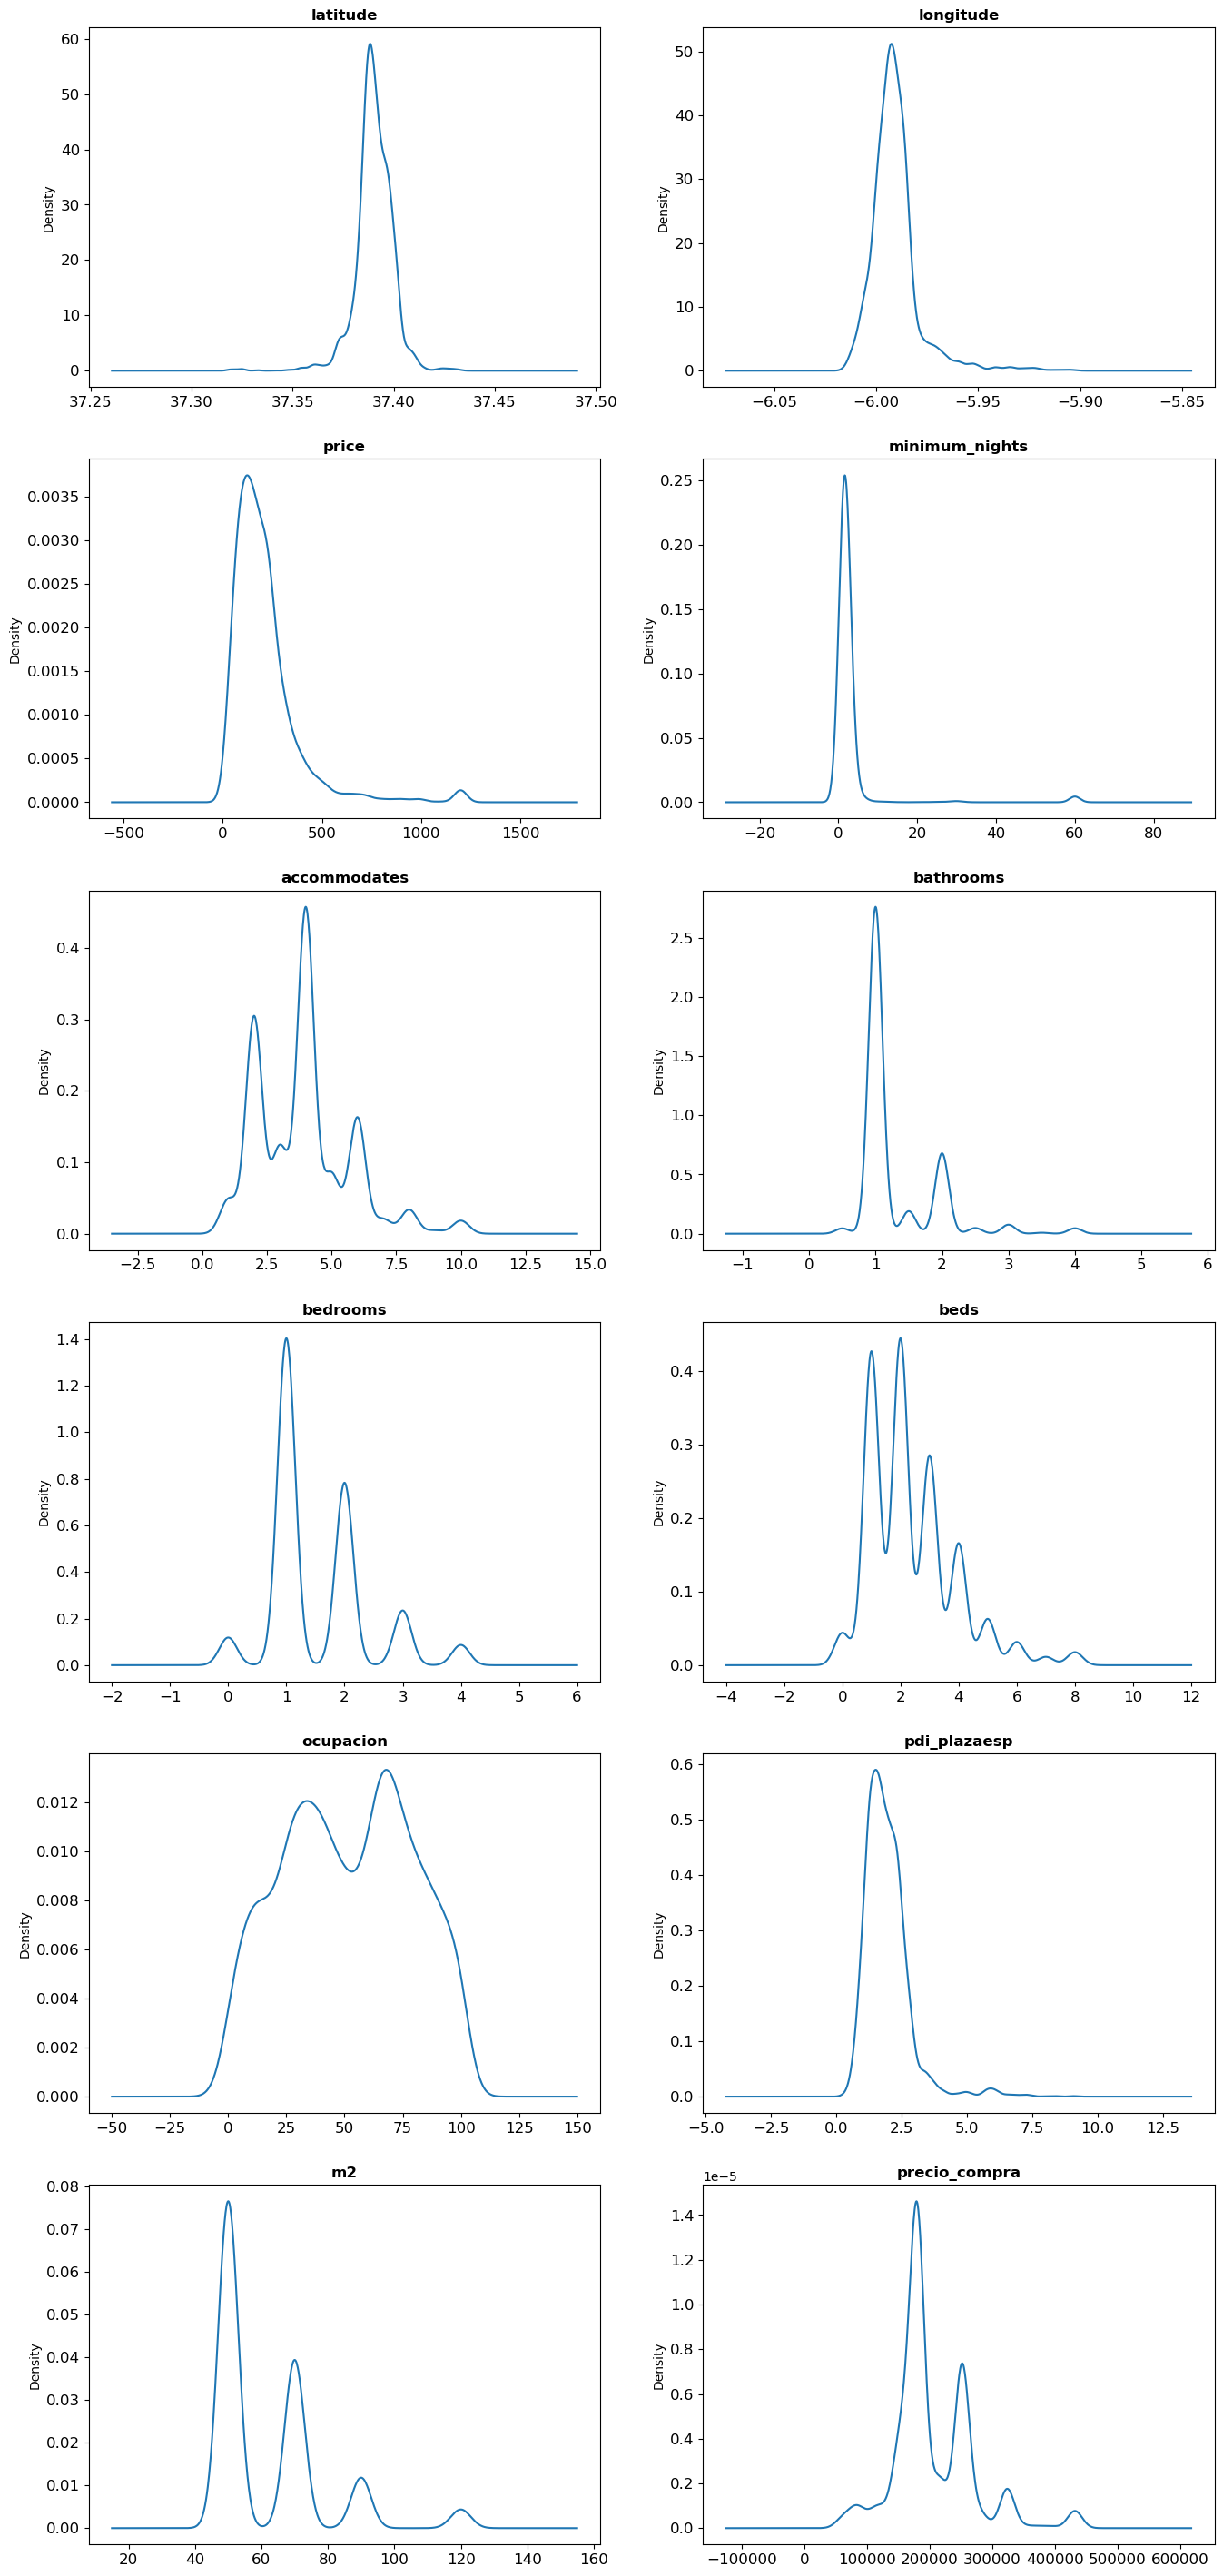

In [96]:
graficos_eda_continuas(num)

## GUARDAR DATASETS TRAS CALIDAD DE DATOS

In [97]:
#Definir los nombres de los archivos
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_eda.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_eda.pickle'

In [98]:
#Guardar los archivos
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)

# CONCLUSIONES ANÁLISIS

Se han localizado varios barrios en los que centrar la búsqueda. Además podemos segmentarlos por el tipo calidad del inmueble en el que nos interes invertir en 3 grandes grupos:
- Inversión baja: Pino Montano
- Inversión media: Macarena (zona norte cerca del Casco Antiguo). Zona de mayor ocupación y con potencial.
- Inversión alta: Parque Maria Luisa, Prado (zona Sur)

Se recomienda buscar inmuebles con una habitación que permitan alojar 3 huéspedes con 2-3 camas.

Se recomienda buscar inmuebles que estando en uno de los barrios identificados no estén necesariamente cerca de puntos de interés.